# G7 vs BRICS - Crecimiento inclusivo y distribución de PBI

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import geopandas as gpd

## Ingesta

In [68]:
inclusive_g = pd.read_csv("../data/US_InclusiveGrowth_20231024115222.csv")

In [69]:
# Create a new column that combines the year and economy
inclusive_g['Year-Economy'] = inclusive_g['Year'].astype(str) + '-' + inclusive_g['Economy'].astype(str)

In [70]:
# Exclude columns with missing values
inclusive_g = inclusive_g[inclusive_g.columns.drop(list(inclusive_g.filter(regex='Footnote')))]
inclusive_g = inclusive_g[inclusive_g.columns.drop(list(inclusive_g.filter(regex='Missing value')))]

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\rodri\AppData\Local\Temp\ipykernel_22436\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


In [72]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [73]:
inclusive_g

,Year,Economy,Economy Label,Category,Category Label,Inclusive growth,Year-Economy
0,2021,8,Albania,0,Overall index,38.0,2021-8
1,2021,8,Albania,1,Economy,14.8,2021-8
2,2021,8,Albania,2,Living conditions,55.8,2021-8
3,2021,8,Albania,3,Equality,59.2,2021-8
4,2021,8,Albania,4,Environment,42.4,2021-8
...,...,...,...,...,...,...,...
640,2021,716,Zimbabwe,0,Overall index,19.2,2021-716
641,2021,716,Zimbabwe,1,Economy,9.6,2021-716
642,2021,716,Zimbabwe,2,Living conditions,30.6,2021-716
643,2021,716,Zimbabwe,3,Equality,44.8,2021-716


In [74]:
# Merge the inclusive_g with world to get the geometry column for plotting the map of the world with the inclusive growth data
inclusive_g_poly = pd.merge(inclusive_g, world, left_on='Economy Label', right_on='name', how='left')

In [75]:
inclusive_g_poly[inclusive_g_poly['geometry'].isnull()]['Economy Label'].unique()

array(['Bolivia (Plurinational State of)', 'Central African Republic',
       'Comoros', 'Congo, Dem. Rep. of the', 'Dominican Republic',
       'Iran (Islamic Republic of)', 'Korea, Republic of',
       "Lao People's Dem. Rep.", 'Maldives', 'Mauritius',
       'Moldova, Republic of', 'Netherlands (Kingdom of the)',
       'Russian Federation', 'Singapore', 'Switzerland, Liechtenstein',
       'Tanzania, United Republic of', 'Türkiye'], dtype=object)

In [76]:
inclusive_g[inclusive_g['Economy Label'].str.contains('Russia')]

,Year,Economy,Economy Label,Category,Category Label,Inclusive growth,Year-Economy
505,2021,643,Russian Federation,0,Overall index,26.5,2021-643
506,2021,643,Russian Federation,1,Economy,27.6,2021-643
507,2021,643,Russian Federation,2,Living conditions,71.1,2021-643
508,2021,643,Russian Federation,3,Equality,62.3,2021-643
509,2021,643,Russian Federation,4,Environment,4.0,2021-643


In [77]:
world[world['name'].str.contains('Russia')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."


In [78]:
# Replace the names of the countries in the world dataframe to match the names in the inclusive_g dataframe
world.loc[world.name.str.contains('Russia'), 'name'] = 'Russian Federation'
world.loc[world.name.str.contains('Iran'), 'name'] = 'Iran (Islamic Republic of)'
world.loc[world.name.str.contains('Bolivia'), 'name'] = 'Bolivia (Plurinational State of)'
world.loc[world.name.str.contains('Central African Rep.'), 'name'] = 'Central African Republic'
world.loc[world.name.str.contains('Dem. Rep. Congo'), 'name'] = 'Congo, Dem. Rep. of the'
world.loc[world.name.str.contains('South Korea'), 'name'] = 'Korea, Republic of'
world.loc[world.name.str.contains('Netherlands'), 'name'] = 'Netherlands (Kingdom of the)'
world.loc[world.name.str.contains('Switzerland'), 'name'] = 'Switzerland, Liechtenstein'
world.loc[world.name.str.contains('Turkey'), 'name'] = 'Türkiye'

In [79]:
# Merge the inclusive_g with world to get the geometry column for plotting the map of the world with the inclusive growth data
inclusive_g_poly = pd.merge(inclusive_g, world, left_on='Economy Label', right_on='name', how='outer')

In [80]:
# Check for missing values in the geometry column
inclusive_g_poly[inclusive_g_poly['geometry'].isnull()]['Economy Label'].unique()

array(['Comoros', 'Dominican Republic', "Lao People's Dem. Rep.",
       'Maldives', 'Mauritius', 'Moldova, Republic of', 'Singapore',
       'Tanzania, United Republic of'], dtype=object)

In [81]:
# create two lists with the countries in the G7 and BRICS groups
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States of America']
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']

In [82]:
inclusive_g[inclusive_g['Economy Label'].isin(g7_countries)]['Economy Label'].unique().size

7

In [83]:
inclusive_g[inclusive_g['Economy Label'].isin(brics_countries)]['Economy Label'].unique().size

5

In [84]:
inclusive_g_poly

,Year,Economy,Economy Label,Category,Category Label,Inclusive growth,Year-Economy,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,2021.0,8.0,Albania,0.0,Overall index,38.0,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
1,2021.0,8.0,Albania,1.0,Economy,14.8,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,2021.0,8.0,Albania,2.0,Living conditions,55.8,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,2021.0,8.0,Albania,3.0,Equality,59.2,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
4,2021.0,8.0,Albania,4.0,Environment,42.4,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3301000.0,Europe,Bosnia and Herz.,BIH,20164.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2083459.0,Europe,North Macedonia,MKD,12547.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930..."
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1794248.0,Europe,Kosovo,-99,7926.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1394973.0,North America,Trinidad and Tobago,TTO,24269.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [85]:
# Create a new column that indicates the group of the country
inclusive_g_poly['Group'] = 'None'
inclusive_g_poly.loc[inclusive_g_poly['name'].isin(g7_countries), 'Group'] = 'G7'
inclusive_g_poly.loc[inclusive_g_poly['name'].isin(brics_countries), 'Group'] = 'BRICS'
inclusive_g_poly

,Year,Economy,Economy Label,Category,Category Label,Inclusive growth,Year-Economy,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Group
0,2021.0,8.0,Albania,0.0,Overall index,38.0,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
1,2021.0,8.0,Albania,1.0,Economy,14.8,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
2,2021.0,8.0,Albania,2.0,Living conditions,55.8,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
3,2021.0,8.0,Albania,3.0,Equality,59.2,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
4,2021.0,8.0,Albania,4.0,Environment,42.4,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3301000.0,Europe,Bosnia and Herz.,BIH,20164.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",None
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2083459.0,Europe,North Macedonia,MKD,12547.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",None
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1794248.0,Europe,Kosovo,-99,7926.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",None
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1394973.0,North America,Trinidad and Tobago,TTO,24269.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",None


In [86]:
inclusive_g_poly.loc[inclusive_g_poly['Category Label'].isnull(),'Category Label'] = 'Overall Index'

In [87]:
df_inclusive_g_poly = inclusive_g_poly[inclusive_g_poly['Category Label'].str.contains('Overall')]

In [88]:
# convierto df_inclusive_overall a geodataframe
gdf_inclusive_overall = gpd.GeoDataFrame(df_inclusive_g_poly, geometry='geometry')

In [89]:
gdf_inclusive_overall['Inclusive growth'].min()

6.1

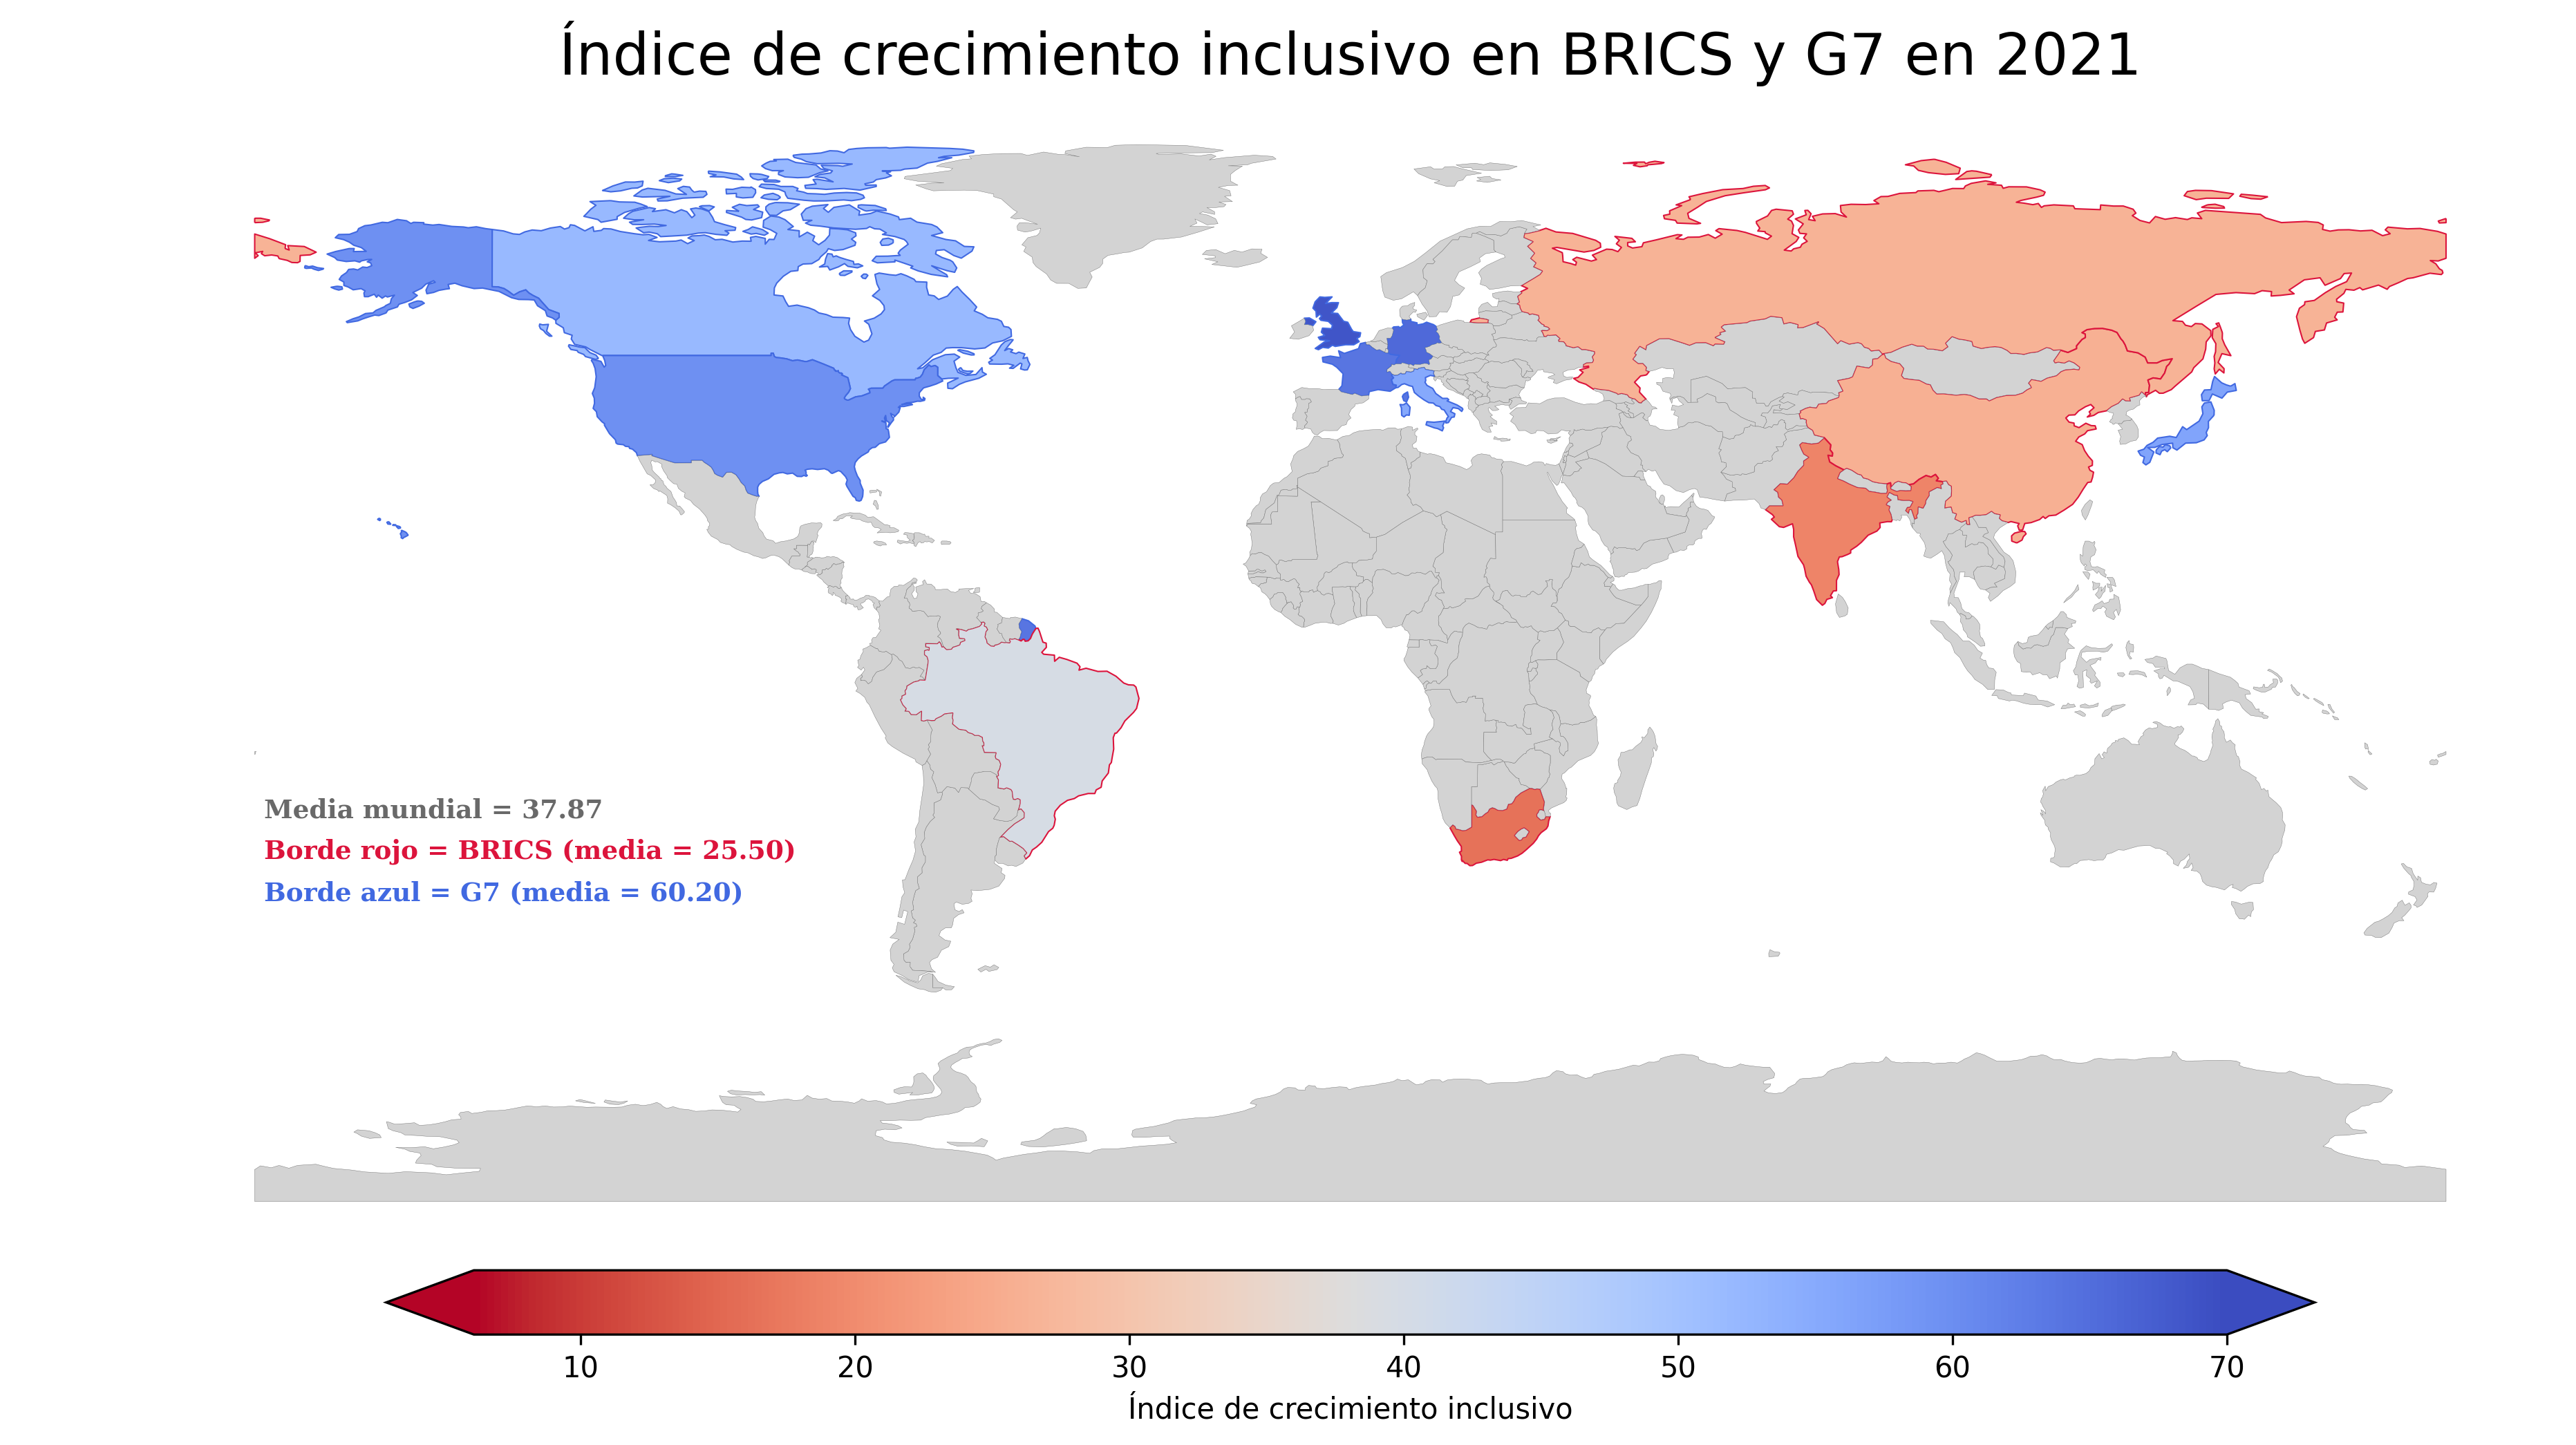

In [90]:
# Plot map with color representing the Inclusive Growth Index for the BRICS and G7 countries, where the intensity is Inclusive Growth and Brics are red and G7 are blue
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=300)

gdf_inclusive_overall[gdf_inclusive_overall.Group == 'G7'].plot(
    column='Inclusive growth',
    cmap='coolwarm_r',
    legend=True,
    legend_kwds={'label': "Índice de crecimiento inclusivo", 'orientation': "horizontal", 'shrink': 0.8, 'pad': 0.01, 'aspect': 30, 'fraction': 0.05, 'extend': 'both'},
    ax=ax,
    vmin=gdf_inclusive_overall['Inclusive growth'].min(),
    vmax=70,
    linewidth=0.5,
    edgecolor='royalblue'
    )
gdf_inclusive_overall[gdf_inclusive_overall.Group == 'BRICS'].plot(
    column='Inclusive growth',
    cmap='coolwarm_r',
    legend=False,
    ax=ax,
    vmin=gdf_inclusive_overall['Inclusive growth'].min(),
    vmax=70,
    linewidth=0.5,
    edgecolor='crimson'
    )
gdf_inclusive_overall[gdf_inclusive_overall.Group == 'None'].plot(
    color='lightgray'
    ,legend=False
    ,ax=ax
    ,linewidth=0.1
    ,edgecolor='dimgrey'
    )

ax.set_title('Índice de crecimiento inclusivo en BRICS y G7 en 2021', fontsize=20)
ax.set_axis_off()
ax.set_aspect('equal')

#bbox = dict(boxstyle='square', facecolor='white', edgecolor='gray', lw=0.5, alpha=0.5, pad=2)
ax.annotate(f'Borde rojo = BRICS (media = {gdf_inclusive_overall[gdf_inclusive_overall.Group == "BRICS"]["Inclusive growth"].mean():.2f})',
            xy=(0.085,0.28),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=9, color='crimson',
            fontweight='bold',
            fontfamily='serif',
            #bbox=bbox
            )
ax.annotate(f'Borde azul = G7 (media = {gdf_inclusive_overall[gdf_inclusive_overall.Group == "G7"]["Inclusive growth"].mean():.2f})',
            xy=(0.085, 0.26),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=9,
            color='royalblue',
            fontweight='bold',
            fontfamily='serif'
            )
ax.annotate(f'Media mundial = {gdf_inclusive_overall["Inclusive growth"].mean():.2f}',
            xy=(0.085, 0.3),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=9, color='dimgrey',
            fontweight='bold',
            fontfamily='serif'
            )

plt.savefig('../inclusive_growth_index_espanol.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

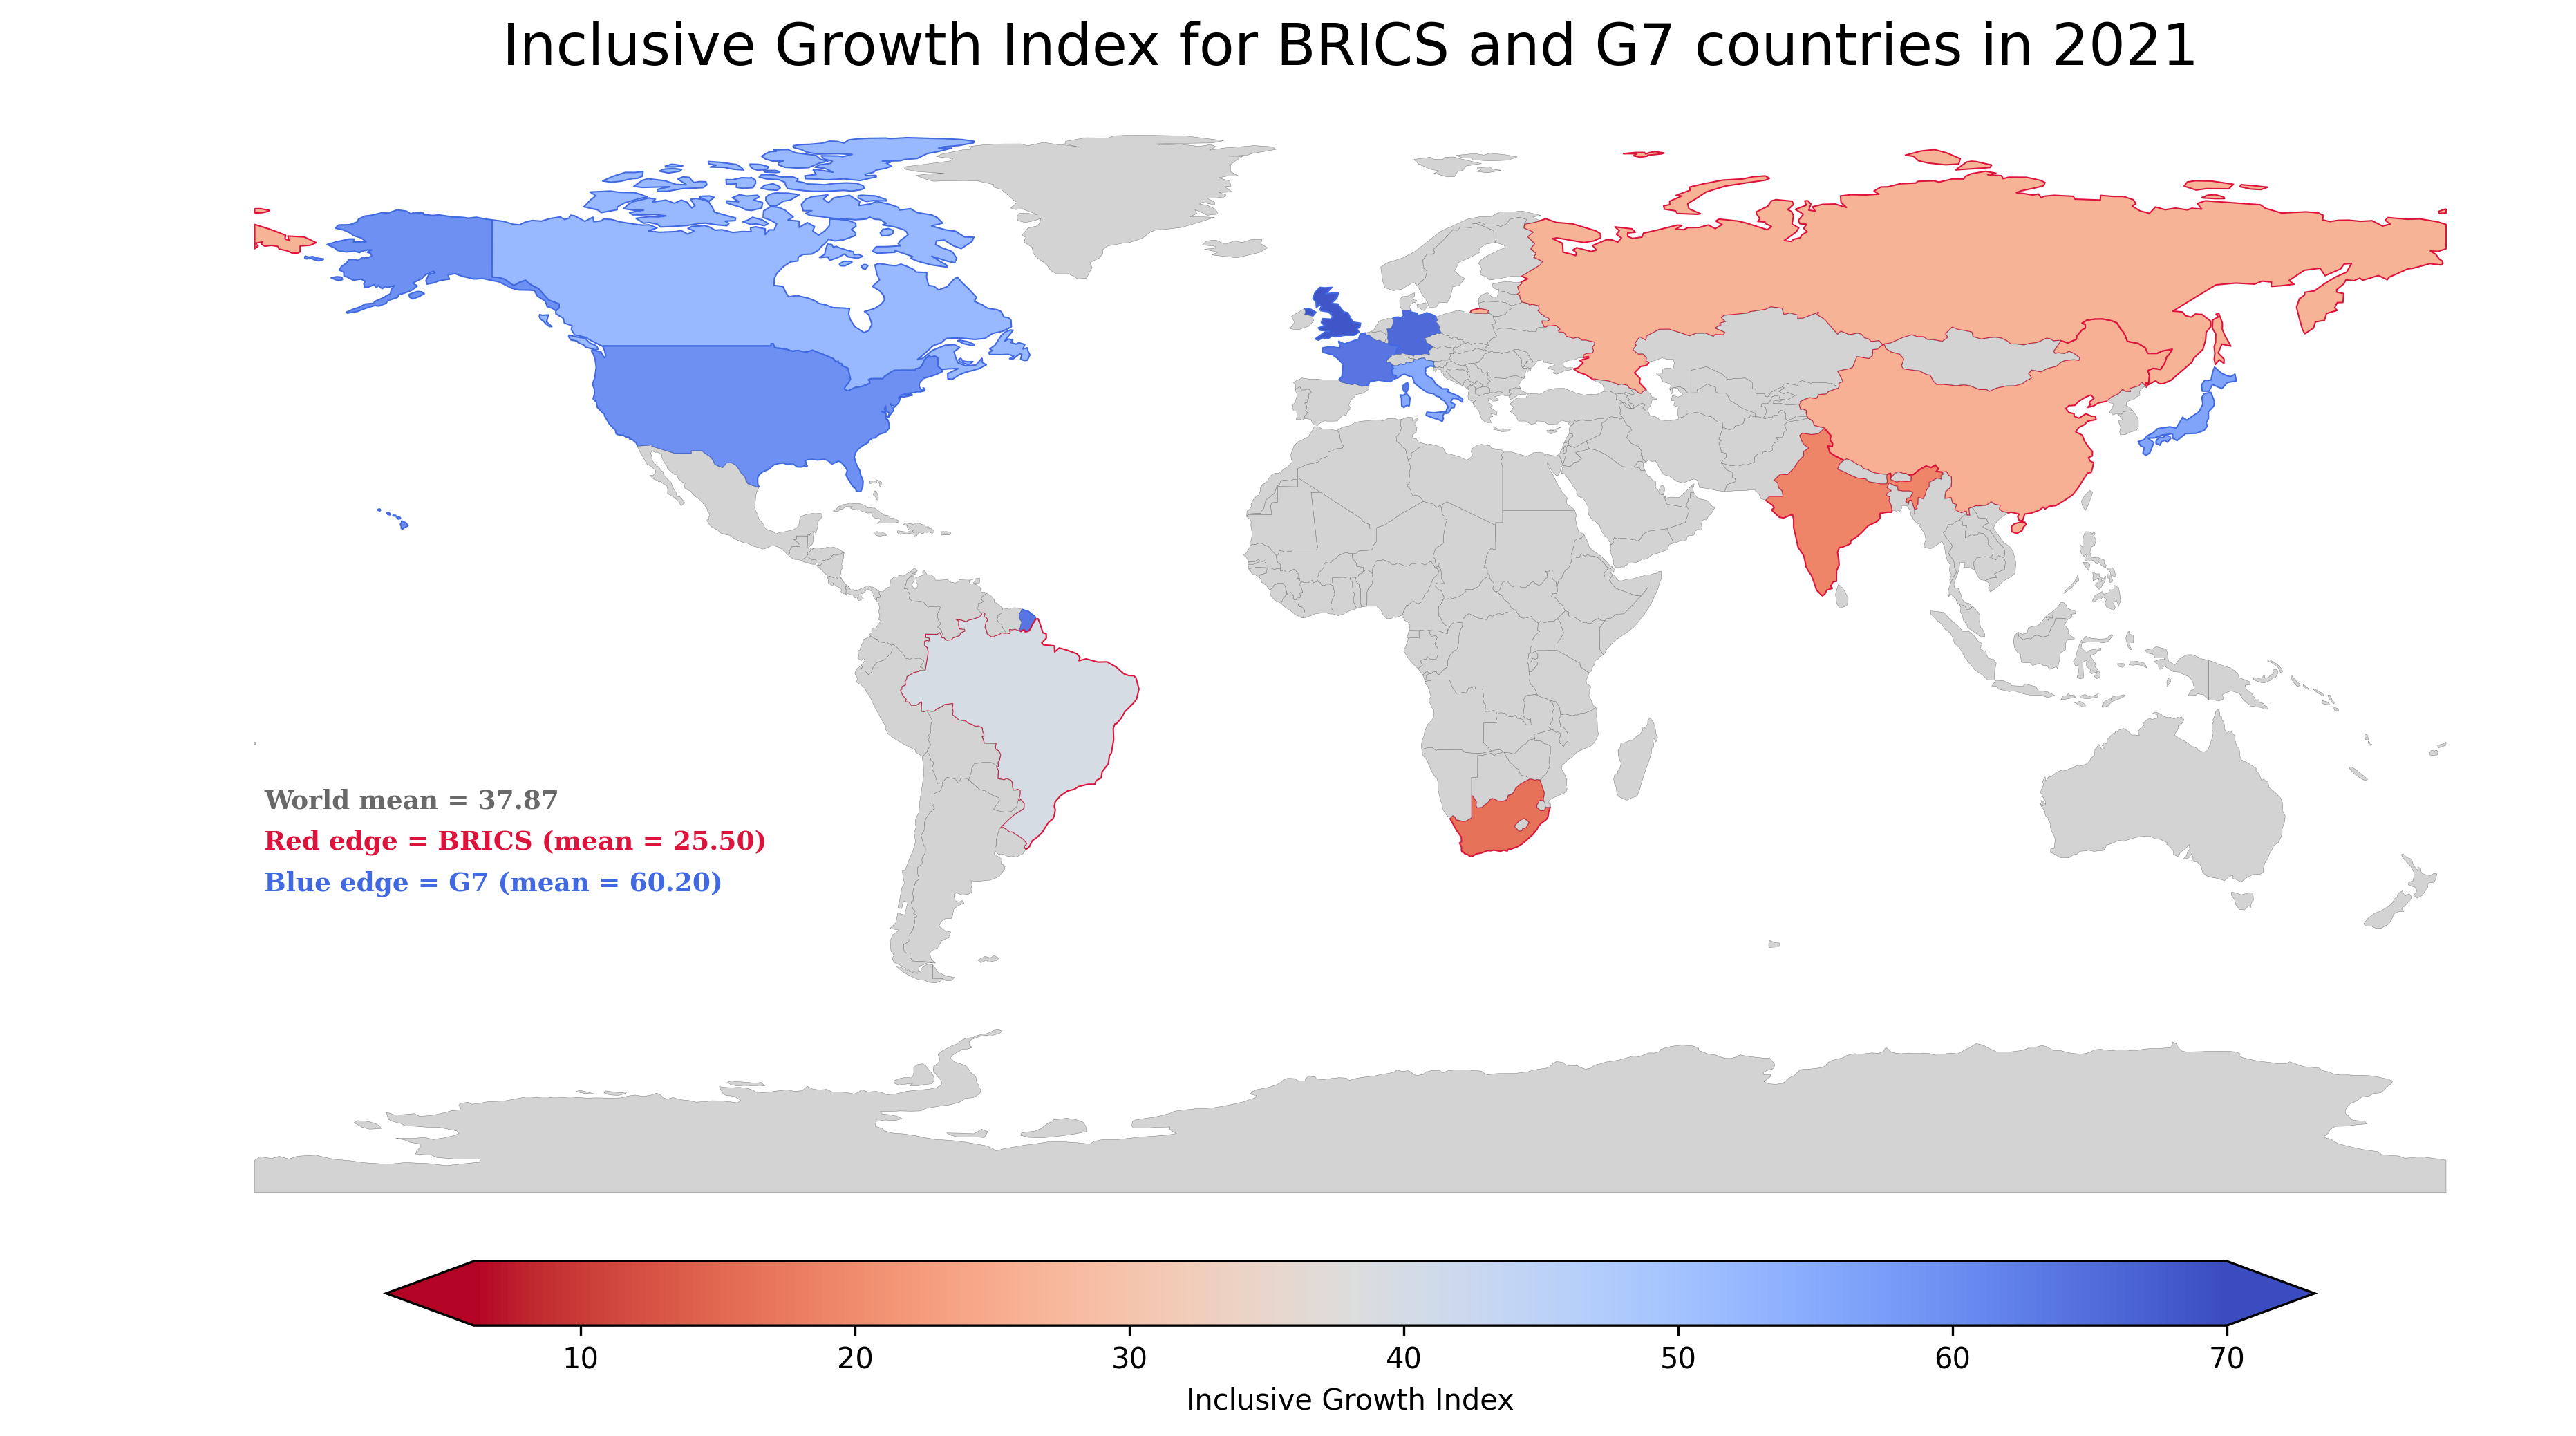

In [91]:
# Plot map with color representing the Inclusive Growth Index for the BRICS and G7 countries, where the intensity is Inclusive Growth and Brics are red and G7 are blue
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=300)

gdf_inclusive_overall[gdf_inclusive_overall.Group == 'G7'].plot(
    column='Inclusive growth',
    cmap='coolwarm_r',
    legend=True,
    legend_kwds={'label': "Inclusive Growth Index", 'orientation': "horizontal", 'shrink': 0.8, 'pad': 0.01, 'aspect': 30, 'fraction': 0.05, 'extend': 'both'},
    ax=ax,
    vmin=gdf_inclusive_overall['Inclusive growth'].min(),
    vmax=70,
    linewidth=0.5,
    edgecolor='royalblue'
    )
gdf_inclusive_overall[gdf_inclusive_overall.Group == 'BRICS'].plot(
    column='Inclusive growth',
    cmap='coolwarm_r',
    legend=False,
    ax=ax,
    vmin=gdf_inclusive_overall['Inclusive growth'].min(),
    vmax=70,
    linewidth=0.5,
    edgecolor='crimson'
    )
gdf_inclusive_overall[gdf_inclusive_overall.Group == 'None'].plot(
    color='lightgray'
    ,legend=False
    ,ax=ax
    ,linewidth=0.1
    ,edgecolor='dimgrey'
    )

ax.set_title('Inclusive Growth Index for BRICS and G7 countries in 2021', fontsize=20)
ax.set_axis_off()
ax.set_aspect('equal')

#bbox = dict(boxstyle='square', facecolor='white', edgecolor='gray', lw=0.5, alpha=0.5, pad=2)
ax.annotate(f'Red edge = BRICS (mean = {gdf_inclusive_overall[gdf_inclusive_overall.Group == "BRICS"]["Inclusive growth"].mean():.2f})',
            xy=(0.085,0.28),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=9, color='crimson',
            fontweight='bold',
            fontfamily='serif',
            #bbox=bbox
            )
ax.annotate(f'Blue edge = G7 (mean = {gdf_inclusive_overall[gdf_inclusive_overall.Group == "G7"]["Inclusive growth"].mean():.2f})',
            xy=(0.085, 0.26),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=9,
            color='royalblue',
            fontweight='bold',
            fontfamily='serif'
            )
ax.annotate(f'World mean = {gdf_inclusive_overall["Inclusive growth"].mean():.2f}',
            xy=(0.085, 0.3),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=9, color='dimgrey',
            fontweight='bold',
            fontfamily='serif'
            )

plt.savefig('../inclusive_growth_index.png', dpi=300, bbox_inches='tight')
plt.show()

In [92]:
# Load the economic freedom index data
freedom_index = pd.read_csv('../data/economicdata2021-2021.csv', sep=',')

In [93]:
inclusive_g_poly.head()

,Year,Economy,Economy Label,Category,Category Label,Inclusive growth,Year-Economy,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Group
0,2021.0,8.0,Albania,0.0,Overall index,38.0,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
1,2021.0,8.0,Albania,1.0,Economy,14.8,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
2,2021.0,8.0,Albania,2.0,Living conditions,55.8,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
3,2021.0,8.0,Albania,3.0,Equality,59.2,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None
4,2021.0,8.0,Albania,4.0,Environment,42.4,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None


In [94]:
freedom_index.drop(columns=['Unnamed: 0'], inplace=True)

In [95]:
freedom_index.Countries.unique()

array(['Angola', 'Albania', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Burundi',
       'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus',
       'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Greece', 'Guatemala',
       'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti',
       'Hungary', 'Indonesia

In [96]:
freedom_index.loc[freedom_index.Countries.str.contains('United')]

,Year,ISO Code,Countries,Economic Freedom Summary Index,Rank,Quartile,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
2,2021,ARE,United Arab Emirates,7.35,50,2,5.28,7.03,8.99,8.01,7.47
54,2021,GBR,United Kingdom,8.01,9,1,6.10,7.99,9.49,8.71,7.75
158,2021,USA,United States,8.14,5,1,7.13,7.86,9.38,8.07,8.29


In [97]:
# Replace the names of the countries in the freedom_index dataframe to match the names in the inclusive_g dataframe
freedom_index.loc[freedom_index.Countries.str.contains('Russia'), 'Countries'] = 'Russian Federation'
freedom_index.loc[freedom_index.Countries.str.contains('Iran'), 'Countries'] = 'Iran (Islamic Republic of)'
freedom_index.loc[freedom_index.Countries.str.contains('Bolivia'), 'Countries'] = 'Bolivia (Plurinational State of)'
freedom_index.loc[freedom_index.Countries.str.contains('Central African Rep.'), 'Countries'] = 'Central African Republic'
freedom_index.loc[freedom_index.Countries.str.contains('Dem. Rep. Congo'), 'Countries'] = 'Congo, Dem. Rep. of the'
freedom_index.loc[freedom_index.Countries.str.contains('South Korea'), 'Countries'] = 'Korea, Republic of'
freedom_index.loc[freedom_index.Countries.str.contains('Netherlands'), 'Countries'] = 'Netherlands (Kingdom of the)'
freedom_index.loc[freedom_index.Countries.str.contains('Switzerland'), 'Countries'] = 'Switzerland, Liechtenstein'
freedom_index.loc[freedom_index.Countries.str.contains('Turkey'), 'Countries'] = 'Türkiye'
freedom_index.loc[freedom_index.Countries.str.contains('United States'), 'Countries'] = 'United States of America'

In [98]:
inclusive_freedom = pd.merge(df_inclusive_g_poly, freedom_index, right_on='Countries', left_on='name', how='left')

In [99]:
inclusive_freedom

,Year_x,Economy,Economy Label,Category,Category Label,Inclusive growth,Year-Economy,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Group,Year_y,ISO Code,Countries,Economic Freedom Summary Index,Rank,Quartile,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,2021.0,8.0,Albania,0.0,Overall index,38.0,2021-8,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",None,2021.0,ALB,Albania,7.60,31.0,1.0,7.73,5.28,9.59,8.43,6.97
1,2021.0,12.0,Algeria,0.0,Overall index,23.4,2021-12,43053054.0,Africa,Algeria,DZA,171091.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",None,2021.0,DZA,Algeria,4.82,157.0,4.0,4.45,3.82,7.08,3.92,4.84
2,2021.0,24.0,Angola,0.0,Overall index,25.3,2021-24,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",None,2021.0,AGO,Angola,5.38,149.0,4.0,7.71,3.18,5.79,5.52,4.73
3,2021.0,32.0,Argentina,0.0,Overall index,43.5,2021-32,44938712.0,South America,Argentina,ARG,445445.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",None,2021.0,ARG,Argentina,4.77,158.0,4.0,6.21,4.98,4.04,3.32,5.30
4,2021.0,51.0,Armenia,0.0,Overall index,35.4,2021-51,2957731.0,Asia,Armenia,ARM,13672.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",None,2021.0,ARM,Armenia,7.58,33.0,1.0,7.76,5.92,9.12,8.15,6.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,Overall Index,NaN,NaN,3301000.0,Europe,Bosnia and Herz.,BIH,20164.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,Overall Index,NaN,NaN,2083459.0,Europe,North Macedonia,MKD,12547.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",None,2021.0,MKD,North Macedonia,7.06,65.0,2.0,6.93,4.74,8.19,7.72,7.69
182,NaN,NaN,NaN,NaN,Overall Index,NaN,NaN,1794248.0,Europe,Kosovo,-99,7926.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,Overall Index,NaN,NaN,1394973.0,North America,Trinidad and Tobago,TTO,24269.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",None,2021.0,TTO,Trinidad and Tobago,6.63,85.0,3.0,6.83,5.05,9.01,6.25,6.00


In [100]:
# group by the group and calculate the mean of the Economic Freedom Summary Index
inclusive_freedom.groupby('Group')['Economic Freedom Summary Index'].mean()

Group
BRICS    6.438000
G7       7.757143
None     6.605469
Name: Economic Freedom Summary Index, dtype: float64

In [101]:
# set the size of the scatter plot points
inclusive_freedom['size_aux_scatter'] = 10
inclusive_freedom.loc[inclusive_freedom['Countries'].isin(g7_countries), 'size_aux_scatter'] = 50
inclusive_freedom.loc[inclusive_freedom['Countries'].isin(brics_countries), 'size_aux_scatter'] = 50

In [102]:
inclusive_freedom.loc[inclusive_freedom['Group'] == 'G7',['Economy Label','Countries','Economic Freedom Summary Index','Inclusive growth','size_aux_scatter']]

,Economy Label,Countries,Economic Freedom Summary Index,Inclusive growth,size_aux_scatter
20,Canada,Canada,7.98,52.0,50
43,France,France,7.40,64.0,50
47,Germany,Germany,7.73,65.7,50
61,Italy,Italy,7.25,55.1,50
62,Japan,Japan,7.79,56.2,50
124,United Kingdom,United Kingdom,8.01,68.7,50
125,United States of America,United States of America,8.14,59.7,50


In [103]:
g7_countries

['Canada',
 'France',
 'Germany',
 'Italy',
 'Japan',
 'United Kingdom',
 'United States of America']

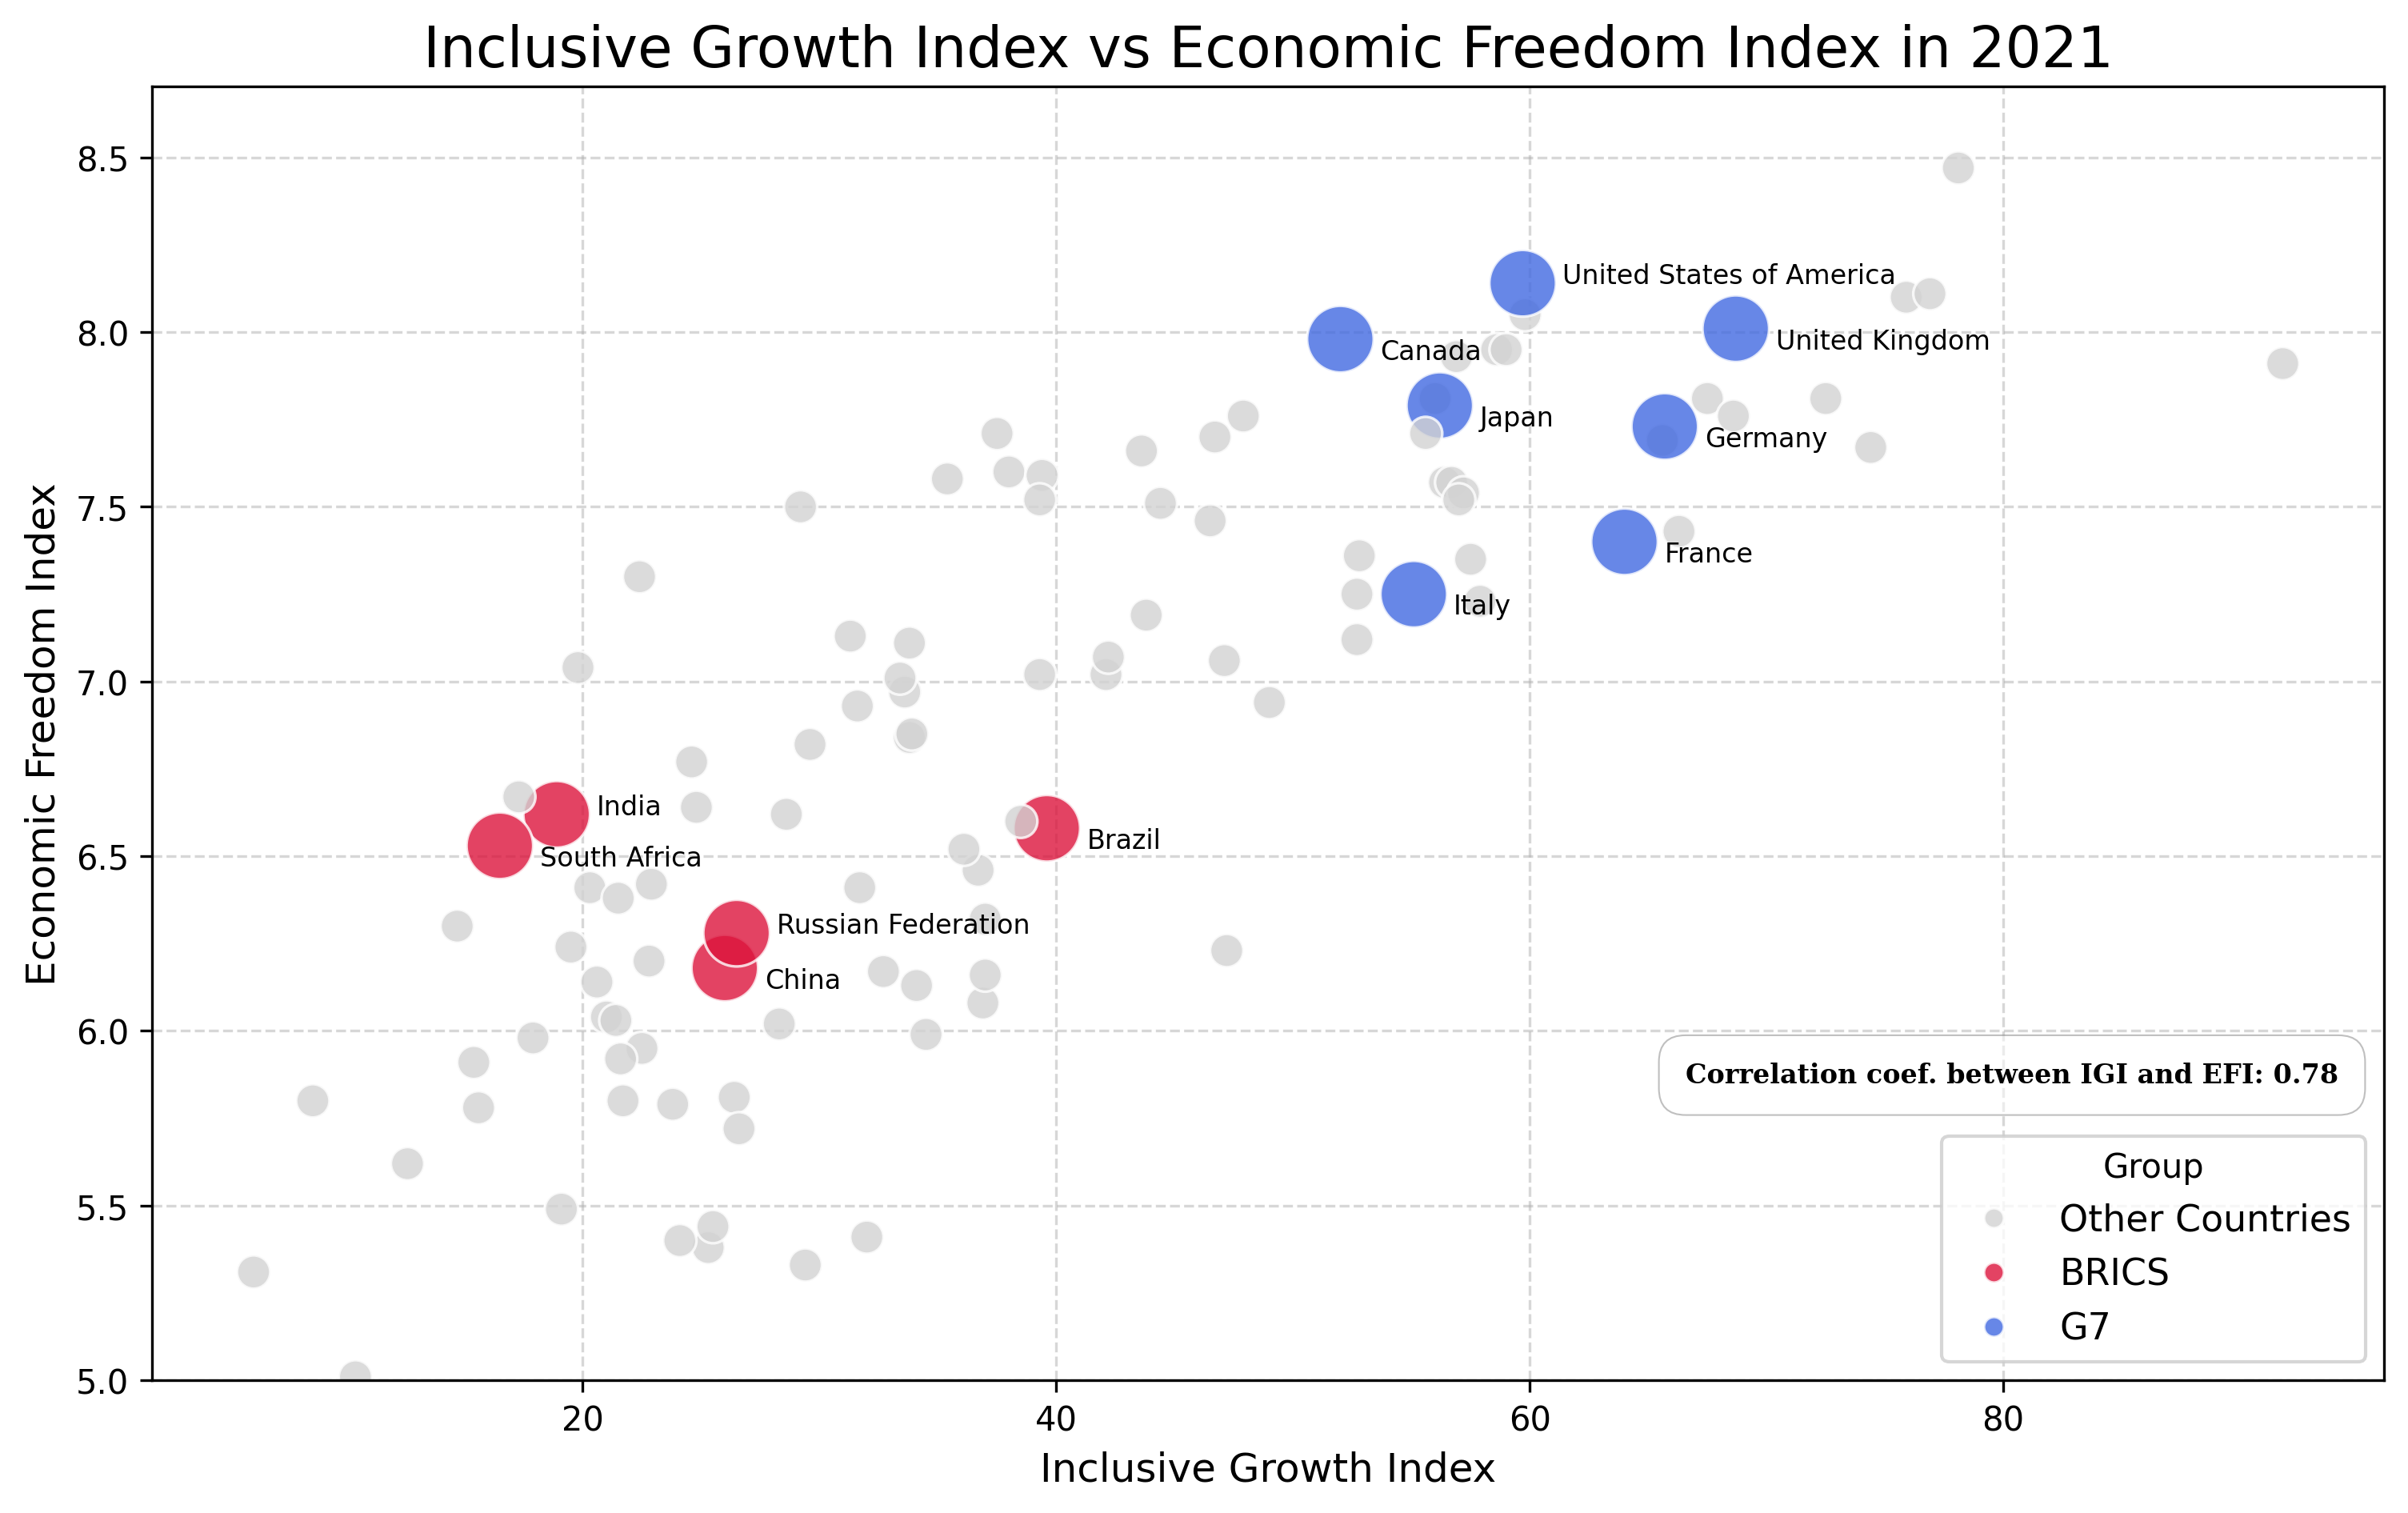

In [104]:
# Plot a scatter plot with the Inclusive Growth Index and the Economic Freedom Index for the G7 and BRICS countries

fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=300)

sns.scatterplot(data=inclusive_freedom,
                x='Inclusive growth',
                y='Economic Freedom Summary Index',
                hue='Group',
                palette={'G7': 'royalblue', 'BRICS': 'crimson', 'None': 'lightgray'},
                size='size_aux_scatter',
                sizes=(100, 400),
                ax=ax,
                zorder=2,
                alpha=0.8
                )

ax.set_title('Inclusive Growth Index vs Economic Freedom Index in 2021', fontsize=17)
ax.set_xlabel('Inclusive Growth Index', fontsize=12)
ax.set_ylabel('Economic Freedom Index', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:4], labels=['Other Countries', 'BRICS', 'G7'], title='Group', loc='lower right', fontsize=11)
ax.grid(linestyle='--', alpha=0.5, zorder=1)
ax.set_ylim(5)

for i, txt in enumerate(inclusive_freedom['Countries']):
    if txt in g7_countries or txt in brics_countries:
         if txt not in ['United States of America', 'Russian Federation','India']:
            ax.annotate(txt, (inclusive_freedom['Inclusive growth'][i], inclusive_freedom['Economic Freedom Summary Index'][i]),
                        textcoords='offset points',
                        xytext=(12, -6),
                        ha='left',
                        fontsize=8,
                        zorder=3
                        )
         elif txt in ['United States of America', 'Russian Federation','India']:
            ax.annotate(txt, (inclusive_freedom['Inclusive growth'][i], inclusive_freedom['Economic Freedom Summary Index'][i]),
                        textcoords='offset points',
                        xytext=(12, 0),
                        ha='left',
                        fontsize=8,
                        zorder=3
                        )

bbox = dict(boxstyle='round', facecolor='white', edgecolor='gray', lw=0.5, alpha=0.5, pad=1)
ax.annotate(f'Correlation coef. between IGI and EFI: {inclusive_freedom["Inclusive growth"].corr(inclusive_freedom["Economic Freedom Summary Index"]):.2f}',
            xy=(0.687, 0.23),
            xycoords='axes fraction',
            fontsize=8,
            color='black',
            fontweight='bold',
            fontfamily='serif',
            bbox=bbox
            )

plt.savefig('../inclusive_freedom_index.png', dpi=300, bbox_inches='tight')
plt.show()

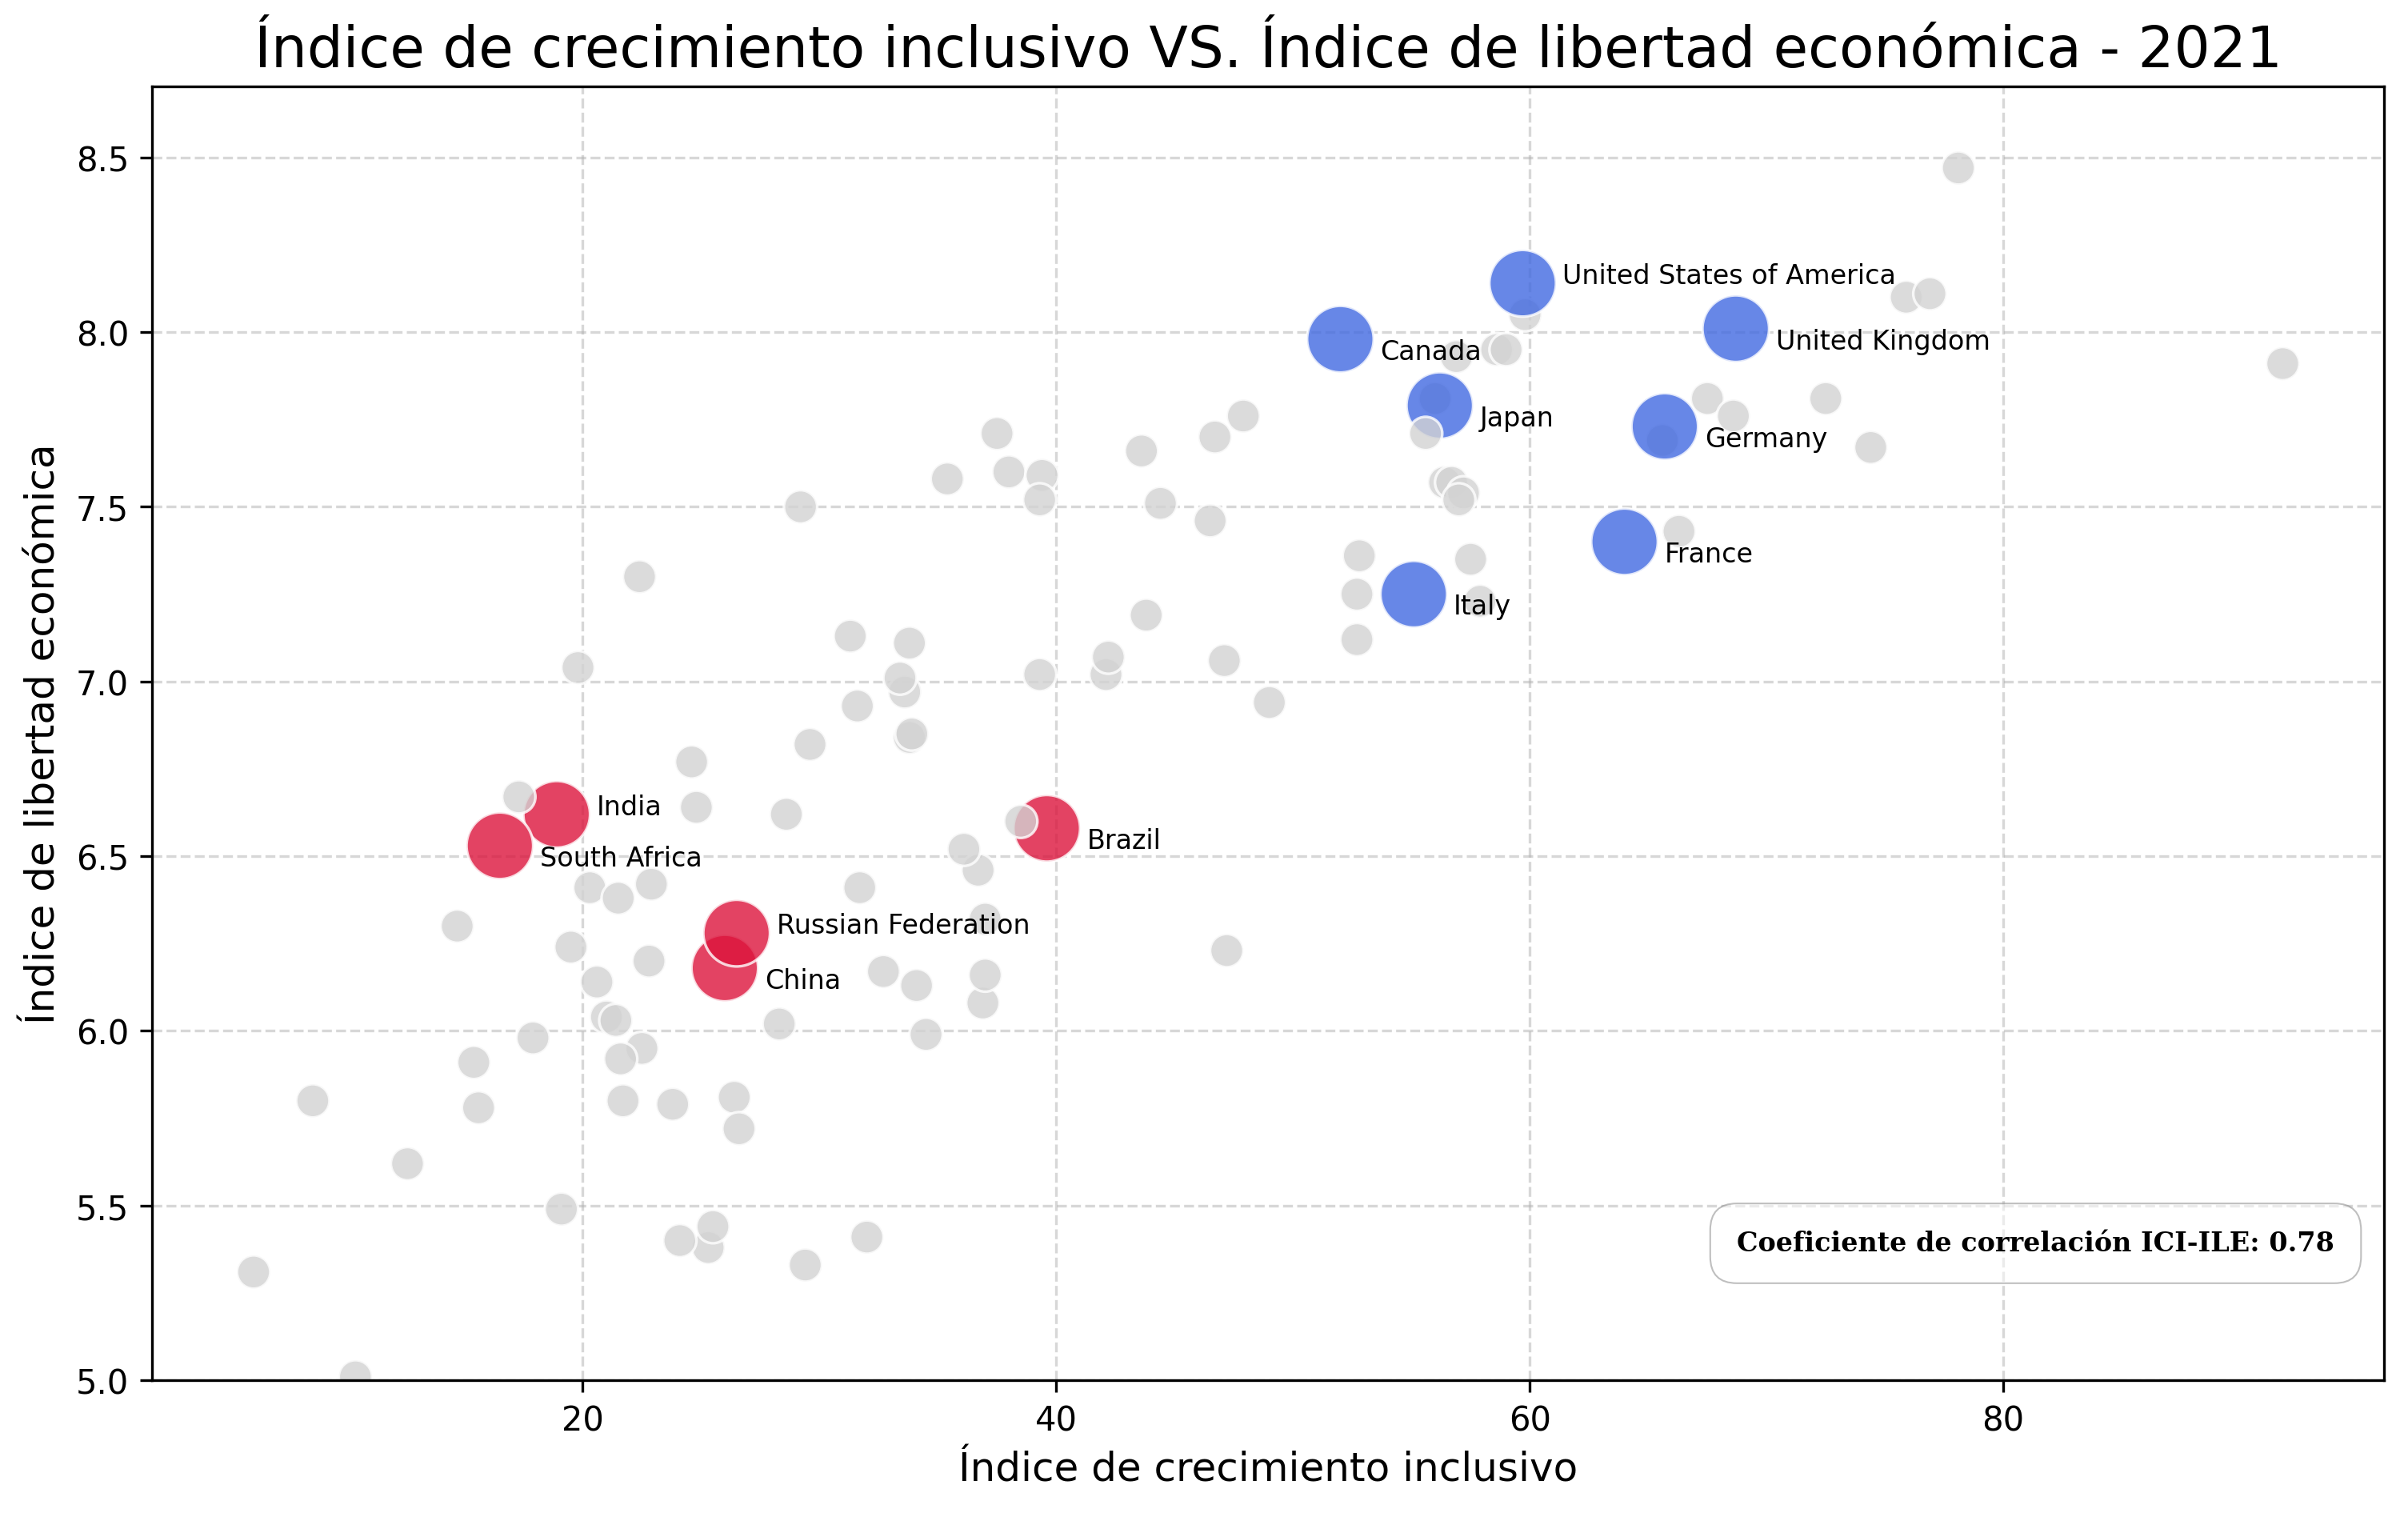

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=300)

sns.scatterplot(data=inclusive_freedom,
                x='Inclusive growth',
                y='Economic Freedom Summary Index',
                hue='Group',
                palette={'G7': 'royalblue', 'BRICS': 'crimson', 'None': 'lightgray'},
                size='size_aux_scatter',
                sizes=(100, 400),
                ax=ax,
                zorder=2,
                alpha=0.8,
                legend=False
                )

ax.set_title('Índice de crecimiento inclusivo VS. Índice de libertad económica - 2021', fontsize=17)
ax.set_xlabel('Índice de crecimiento inclusivo', fontsize=12)
ax.set_ylabel('Índice de libertad económica', fontsize=12)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:4], labels=['Otros países', 'BRICS', 'G7'], title='Grupo', loc='lower right', fontsize=11)
ax.grid(linestyle='--', alpha=0.5, zorder=1)
ax.set_ylim(5)

for i, txt in enumerate(inclusive_freedom['Countries']):
    if txt in g7_countries or txt in brics_countries:
         if txt not in ['United States of America', 'Russian Federation','India']:
            ax.annotate(txt, (inclusive_freedom['Inclusive growth'][i], inclusive_freedom['Economic Freedom Summary Index'][i]),
                        textcoords='offset points',
                        xytext=(12, -6),
                        ha='left',
                        fontsize=8,
                        zorder=3
                        )
         elif txt in ['United States of America', 'Russian Federation','India']:
            ax.annotate(txt, (inclusive_freedom['Inclusive growth'][i], inclusive_freedom['Economic Freedom Summary Index'][i]),
                        textcoords='offset points',
                        xytext=(12, 0),
                        ha='left',
                        fontsize=8,
                        zorder=3
                        )

bbox = dict(boxstyle='round', facecolor='white', edgecolor='gray', lw=0.5, alpha=0.5, pad=1)
ax.annotate(f'Coeficiente de correlación ICI-ILE: {inclusive_freedom["Inclusive growth"].corr(inclusive_freedom["Economic Freedom Summary Index"]):.2f}',
            xy=(0.71, 0.1),
            xycoords='axes fraction',
            fontsize=8,
            color='black',
            fontweight='bold',
            fontfamily='serif',
            bbox=bbox
            )

plt.savefig('../inclusive_freedom_index_espanol.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [106]:
pbi = pd.read_csv('../data/pbi.csv')

In [107]:
pbi.drop(columns=['Unnamed: 68'], inplace=True)

In [108]:
g7_country_codes = ['CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'GBR', 'USA']
brics_country_codes = ['BRA', 'RUS', 'IND', 'CHN', 'ZAF']

In [109]:
pd.set_option('display.max_columns', 500)

In [110]:
pbi[pbi['Country Code'].isin(g7_country_codes+brics_country_codes)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
29,Brasil,BRA,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.255953e+11,4.619518e+11,4.073378e+11,3.905904e+11,4.383022e+11,5.462297e+11,7.693331e+11,8.504264e+11,8.832062e+11,8.637108e+11,5.996420e+11,6.554482e+11,5.599836e+11,5.097953e+11,5.582337e+11,6.692894e+11,8.916338e+11,1.107627e+12,1.397114e+12,1.695855e+12,1.666996e+12,2.208838e+12,2.616156e+12,2.465228e+12,2.472820e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.873288e+12,1.476107e+12,1.649623e+12,1.920096e+12,NaN
35,Canadá,CAN,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,4.046172e+10,4.093495e+10,4.222745e+10,4.502999e+10,4.937752e+10,5.451518e+10,6.108838e+10,6.566866e+10,7.182981e+10,7.914841e+10,8.819226e+10,9.960645e+10,1.134638e+11,1.317643e+11,1.609492e+11,1.744198e+11,2.072716e+11,2.123252e+11,2.193695e+11,2.438911e+11,2.747766e+11,3.072466e+11,3.146478e+11,3.418663e+11,3.567184e+11,3.661860e+11,3.790068e+11,4.331342e+11,5.093800e+11,5.672120e+11,5.960756e+11,6.125277e+11,5.943874e+11,5.790536e+11,5.799443e+11,6.059611e+11,6.306080e+11,6.549870e+11,6.340000e+11,6.784122e+11,7.447734e+11,7.389818e+11,7.606493e+11,8.955406e+11,1.026690e+12,1.173109e+12,1.319265e+12,1.468820e+12,1.552990e+12,1.374625e+12,1.617343e+12,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.743725e+12,1.655685e+12,2.007472e+12,2.161483e+12,NaN
40,China,CHN,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,5.971625e+10,5.005669e+10,4.720919e+10,5.070661e+10,5.970813e+10,7.043601e+10,7.672001e+10,7.288136e+10,7.084628e+10,7.970561e+10,9.260263e+10,9.980059e+10,1.136893e+11,1.385432e+11,1.441890e+11,1.634295e+11,1.539393e+11,1.749359e+11,2.185022e+11,2.637117e+11,3.061653e+11,2.895766e+11,2.839287e+11,3.047489e+11,3.137285e+11,3.098358e+11,3.005142e+11,3.270894e+11,4.078447e+11,4.562891e+11,3.945657e+11,4.133754e+11,4.931370e+11,6.191119e+11,5.643219e+11,7.344848e+11,8.637493e+11,9.616020e+11,1.029061e+12,1.094010e+12,1.211332e+12,1.339401e+12,1.470558e+12,1.660281e+12,1.955347e+12,2.285961e+12,2.752119e+12,3.550328e+12,4.594337e+12,5.101691e+12,6.087192e+12,7.551546e+12,8.532185e+12,9.570471e+12,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.796317e+13,NaN
55,Alemania,DEU,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.158384e+11,2.499851e+11,2.998015e+11,3.983740e+11,4.453035e+11,4.906365e+11,5.197545e+11,6.004982e+11,7.404700e+11,8.813452e+11,9.502909e+11,8.004721e+11,7.765764e+11,7.706843e+11,7.251111e+11,7.325349e+11,1.046259e+12,1.298176e+12,1.401233e+12,1.398967e+12,1.771671e+12,1.868945e+12,2.131572e+12,2.071324e+12,2.205074e+12,2.585792e+12,2.497245e+12,2.211990e+12,2.238991e+12,2.194945e+12,1.947982e+12,1.945791e+12,2.078485e+12,2.501640e+12,2.814354e+12,2.846864e+12,2.994704e+12,3.425578e+12,3.745264e+12,3.411261e+12,3.399668e+12,3.749315e+12,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12,3.469853e+12,3.690849e+12,3.974443e+12,3.889178e+12,3.887727e+12,4.278504e+12,4.082469e+12,NaN
77,Francia,FRA,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,6.222548e+10,6.746164e+10,7.560753e+10,8.475920e+10,9.400785e+10,1.015372e+11,1.100459e+11,1.189730e+11,1.297854e+11,1.419031e+11,1.484564e+11,1.659666e+11,2.034941e+11,2.644299e+11,2.855537e+11,3.608322e+11,3.723190e+11,4.102795e+11,5.067093e+11,6.139531e+11,7.012884e+11,6.155522e+11,5.848777e+11,5.598692e+11,5.306838e+11,5.531384e+11,7.714708e+11,9.341733e+11,1.018847e+12,1.025212e+12,

In [111]:
years_to_del = list(map(str, range(1960, 1990)))

In [112]:
pbi.drop(columns=years_to_del, inplace=True)

In [113]:
years_perc = list(map(str, range(1990, 2023)))

In [114]:
pbi_filtered = pbi[pbi['Country Code'].isin(g7_country_codes+brics_country_codes+['WLD'])]

In [115]:
# Create a new column for each year that contains the percentage of the GDP of the country with respect to the world GDP
for i in years_perc:
    pbi_filtered[f'{i}_perc'] = pbi_filtered[i] / pbi_filtered[pbi_filtered['Country Code']=='WLD'][i].values[0]

C:\Users\rodri\AppData\Local\Temp\ipykernel_22436\2399890448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rodri\AppData\Local\Temp\ipykernel_22436\2399890448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rodri\AppData\Local\Temp\ipykernel_22436\2399890448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [116]:
pbi_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,1990_perc,1991_perc,1992_perc,1993_perc,1994_perc,1995_perc,1996_perc,1997_perc,1998_perc,1999_perc,2000_perc,2001_perc,2002_perc,2003_perc,2004_perc,2005_perc,2006_perc,2007_perc,2008_perc,2009_perc,2010_perc,2011_perc,2012_perc,2013_perc,2014_perc,2015_perc,2016_perc,2017_perc,2018_perc,2019_perc,2020_perc,2021_perc,2022_perc
29,Brasil,BRA,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,4.619518e+11,4.073378e+11,3.905904e+11,4.383022e+11,5.462297e+11,7.693331e+11,8.504264e+11,8.832062e+11,8.637108e+11,5.996420e+11,6.554482e+11,5.599836e+11,5.097953e+11,5.582337e+11,6.692894e+11,8.916338e+11,1.107627e+12,1.397114e+12,1.695855e+12,1.666996e+12,2.208838e+12,2.616156e+12,2.465228e+12,2.472820e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.873288e+12,1.476107e+12,1.649623e+12,1.920096e+12,NaN,0.020142,0.017020,0.015243,0.016707,0.019510,0.024678,0.026659,0.027776,0.027205,0.018290,0.019335,0.016622,0.014573,0.014234,0.015144,0.018630,0.021357,0.023904,0.026404,0.027379,0.033112,0.035370,0.032603,0.031819,0.030763,0.023939,0.023467,0.025324,0.022150,0.021341,0.017310,0.016980,0.019034
35,Canadá,CAN,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,5.960756e+11,6.125277e+11,5.943874e+11,5.790536e+11,5.799443e+11,6.059611e+11,6.306080e+11,6.549870e+11,6.340000e+11,6.784122e+11,7.447734e+11,7.389818e+11,7.606493e+11,8.955406e+11,1.026690e+12,1.173109e+12,1.319265e+12,1.468820e+12,1.552990e+12,1.374625e+12,1.617343e+12,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.743725e+12,1.655685e+12,2.007472e+12,2.161483e+12,NaN,0.025990,0.025594,0.023197,0.022072,0.020714,0.019437,0.019768,0.020599,0.019969,0.020693,0.021970,0.021935,0.021744,0.022834,0.023231,0.024512,0.025438,0.025131,0.024179,0.022577,0.024245,0.024246,0.024181,0.023761,0.022618,0.020675,0.019969,0.020240,0.019936,0.019865,0.019416,0.020663,0.021426
40,China,CHN,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,3.945657e+11,4.133754e+11,4.931370e+11,6.191119e+11,5.643219e+11,7.344848e+11,8.637493e+11,9.616020e+11,1.029061e+12,1.094010e+12,1.211332e+12,1.339401e+12,1.470558e+12,1.660281e+12,1.955347e+12,2.285961e+12,2.752119e+12,3.550328e+12,4.594337e+12,5.101691e+12,6.087192e+12,7.551546e+12,8.532185e+12,9.570471e+12,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.796317e+13,NaN,0.017204,0.017273,0.019245,0.023599,0.020156,0.023560,0.027077,0.030241,0.032413,0.033370,0.035734,0.039758,0.042037,0.042333,0.044243,0.047764,0.053066,0.060745,0.071532,0.083791,0.091253,0.102096,0.112841,0.123149,0.131212,0.146933,0.146804,0.151078,0.160556,0.162684,0.172244,0.183426,0.178066
55,Alemania,DEU,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.771671e+12,1.868945e+12,2.131572e+12,2.071324e+12,2.205074e+12,2.585792e+12,2.497245e+12,2.211990e+12,2.238991e+12,2.194945e+12,1.947982e+12,1.945791e+12,2.078485e+12,2.501640e+12,2.814354e+12,2.846864e+12,2.994704e+12,3.425578e+12,3.745264e+12,3.411261e+12,3.399668e+12,3.749315e+12,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12,3.469853e+12,3.690849e+12,3.974443e+12,3.889178e+12,3.887727e+12,4.278504e+12,4.082469e+12,NaN,0.077247,0.078092,0.083187,0.078952,0.078760,0.082943,0.078284,0.069565,0.070523,0.066951,0.057464,0.057757,0.059415,0.063786,0.063680,0.059484,0.057743,0.058610,0.058312,0.056027,0.050964,0.050690,0.046648,0.048045,0.048713,0.044599,0.045346,0.045295,0.045925,0.044307,0.045592,0.044039,0.040469
77,Francia,FRA,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.269180e+12,1.269277e+12,1.401466e+12,1.322816e+12,1.393983e+12,1.601095e+12,1.605675e+12,1.452885e+12,1.503109e+12,1.493152e+12,1.365640e+12,1.377657e+12,1.501409e+12,1.844545e+12,2.119633e+12,2.196945e+12,2.320536e+12,2.660591e+

In [117]:
# Melt the dataframe to have the years as rows
pbi_filtered_melt = pbi_filtered.melt(id_vars=['Country Name','Country Code'], value_vars=[f'{i}_perc' for i in years_perc], var_name='Year', value_name='PBI_perc')
pbi_filtered_melt_abs = pbi_filtered.melt(id_vars=['Country Name', 'Country Code'], value_vars=years_perc, var_name='Year', value_name='PBI')

In [118]:
# Merge the inclusive_freedom with pbi_filtered_melt_abs to get the PBI data
pbi_filtered_melt['PBI'] = pbi_filtered_melt_abs['PBI']
pbi_filtered_melt['Year_ok'] = pbi_filtered_melt.Year.str.split('_').str[0]

In [119]:
g7_codes_to_names = {'CAN': 'Canada', 'FRA': 'France', 'DEU': 'Germany', 'ITA': 'Italy', 'JPN': 'Japan', 'GBR': 'United Kingdom', 'USA': 'United States of America'}
brics_codes_to_names = {'BRA': 'Brazil', 'RUS': 'Russian Federation', 'IND': 'India', 'CHN': 'China', 'ZAF': 'South Africa'}

In [120]:
pbi_filtered_melt['Country'] = pbi_filtered_melt['Country Code'].map(g7_codes_to_names)
pbi_filtered_melt['Country'] = pbi_filtered_melt['Country'].fillna(pbi_filtered_melt['Country Code'].map(brics_codes_to_names))
pbi_filtered_melt['Country'] = pbi_filtered_melt['Country'].fillna('World')

pbi_filtered_melt

,Country Name,Country Code,Year,PBI_perc,PBI,Year_ok,Country
0,Brasil,BRA,1990_perc,0.020142,4.619518e+11,1990,Brazil
1,Canadá,CAN,1990_perc,0.025990,5.960756e+11,1990,Canada
2,China,CHN,1990_perc,0.017204,3.945657e+11,1990,China
3,Alemania,DEU,1990_perc,0.077247,1.771671e+12,1990,Germany
4,Francia,FRA,1990_perc,0.055338,1.269180e+12,1990,France
...,...,...,...,...,...,...,...
424,Japón,JPN,2022_perc,0.042193,4.256411e+12,2022,Japan
425,Federación de Rusia,RUS,2022_perc,0.022209,2.240422e+12,2022,Russian Federation
426,Estados Unidos,USA,2022_perc,0.252179,2.543970e+13,2022,United States of America
427,Mundo,WLD,2022_perc,1.000000,1.008796e+14,2022,World


In [121]:
pbi_filtered_melt['Group'] = 'None'
pbi_filtered_melt.loc[pbi_filtered_melt['Country'].isin(g7_countries), 'Group'] = 'G7'
pbi_filtered_melt.loc[pbi_filtered_melt['Country'].isin(brics_countries), 'Group'] = 'BRICS'

pbi_filtered_melt

,Country Name,Country Code,Year,PBI_perc,PBI,Year_ok,Country,Group
0,Brasil,BRA,1990_perc,0.020142,4.619518e+11,1990,Brazil,BRICS
1,Canadá,CAN,1990_perc,0.025990,5.960756e+11,1990,Canada,G7
2,China,CHN,1990_perc,0.017204,3.945657e+11,1990,China,BRICS
3,Alemania,DEU,1990_perc,0.077247,1.771671e+12,1990,Germany,G7
4,Francia,FRA,1990_perc,0.055338,1.269180e+12,1990,France,G7
...,...,...,...,...,...,...,...,...
424,Japón,JPN,2022_perc,0.042193,4.256411e+12,2022,Japan,G7
425,Federación de Rusia,RUS,2022_perc,0.022209,2.240422e+12,2022,Russian Federation,BRICS
426,Estados Unidos,USA,2022_perc,0.252179,2.543970e+13,2022,United States of America,G7
427,Mundo,WLD,2022_perc,1.000000,1.008796e+14,2022,World,None


C:\Users\rodri\AppData\Local\Temp\ipykernel_22436\3286102880.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


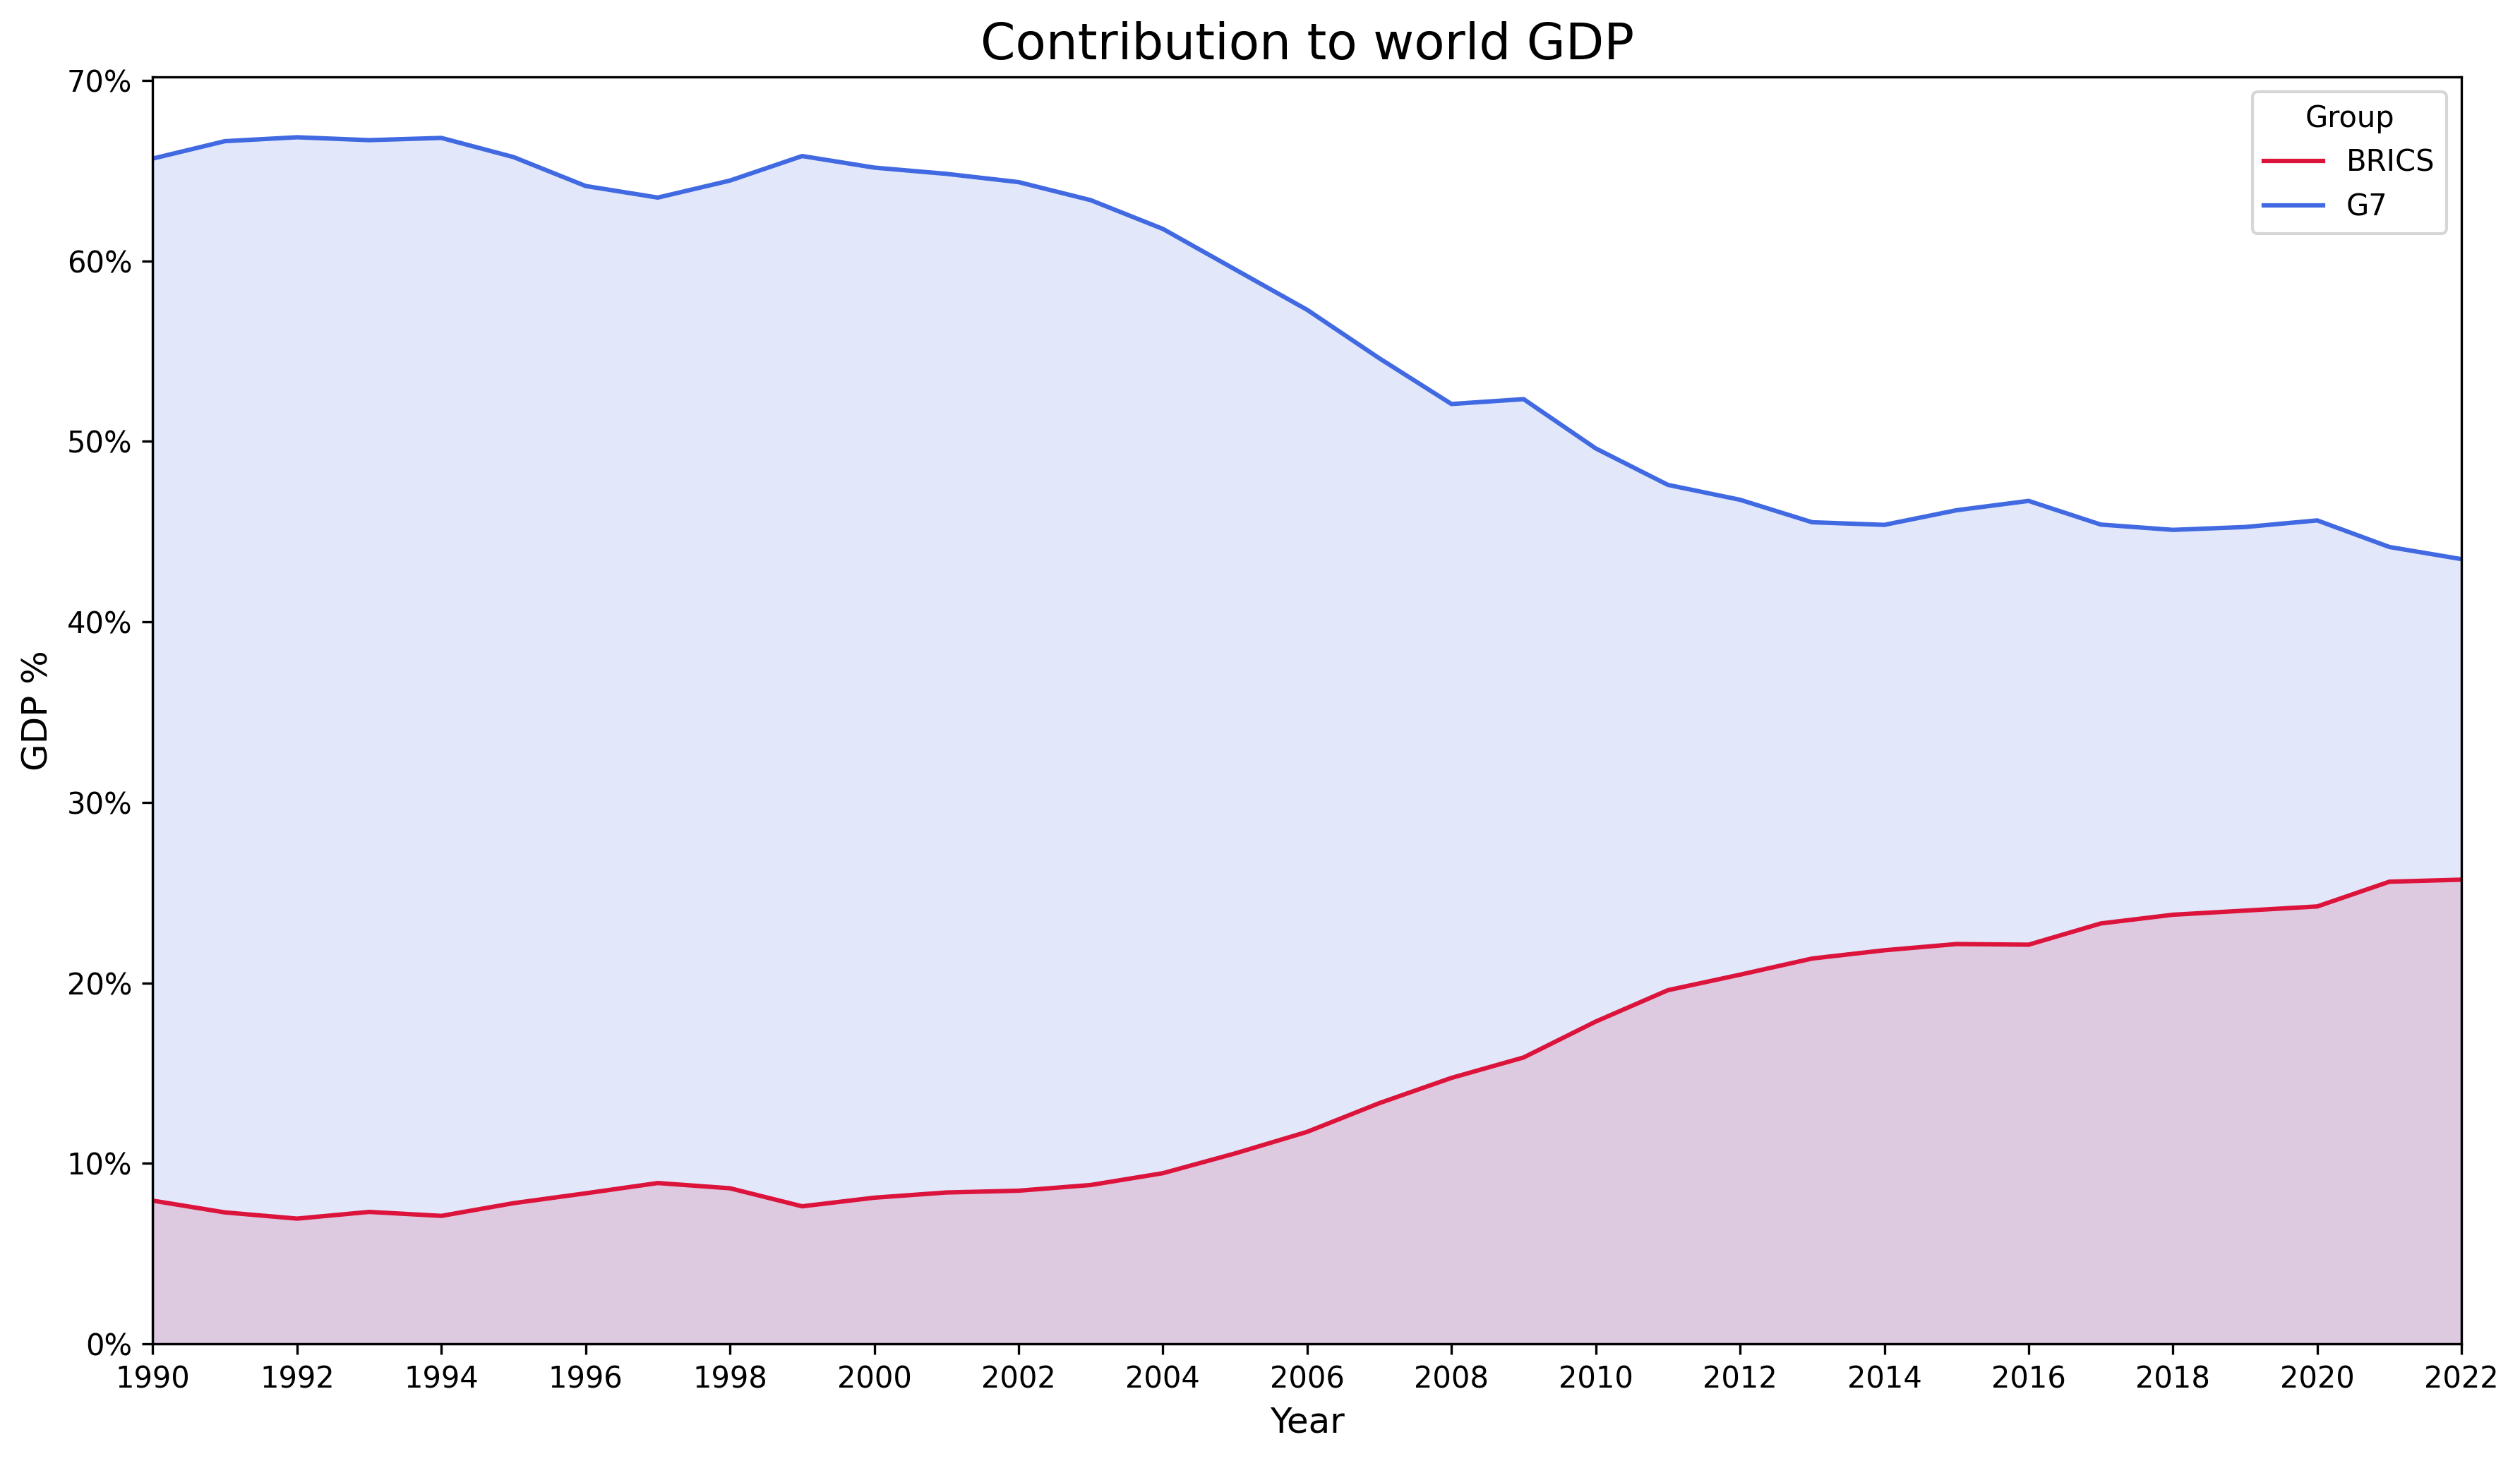

In [122]:
# Plot the contribution to the world GDP of the G7 and BRICS countries

fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=300)

sns.lineplot(data=pbi_filtered_melt[pbi_filtered_melt.Group != 'None'],
                x='Year_ok',
                y='PBI_perc',
                hue='Group',
                palette={'G7': 'royalblue', 'BRICS': 'crimson', 'None': 'lightgray'},
                ax=ax,
                zorder=2,
                estimator=np.sum,
                errorbar=None,
                )

# fill the area between each line and the x axis with the same color as the line
for line in ax.lines:
    y = line.get_ydata()
    ax.fill_between(range(len(y)), y, color=line.get_color(), alpha=0.15)

ax.set_xlim(0, 32)
ax.set_ylim(0)

ax.set_title('Contribution to world GDP', fontsize=17)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP %', fontsize=12)


ax.set_xticks(np.arange(0, 33, 2))
ax.set_xticklabels(np.arange(1990, 2023, 2))

# nombres en el eje y como porcentajes
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

plt.tight_layout()
plt.savefig('../pbi_contribution.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_22436\1407377102.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


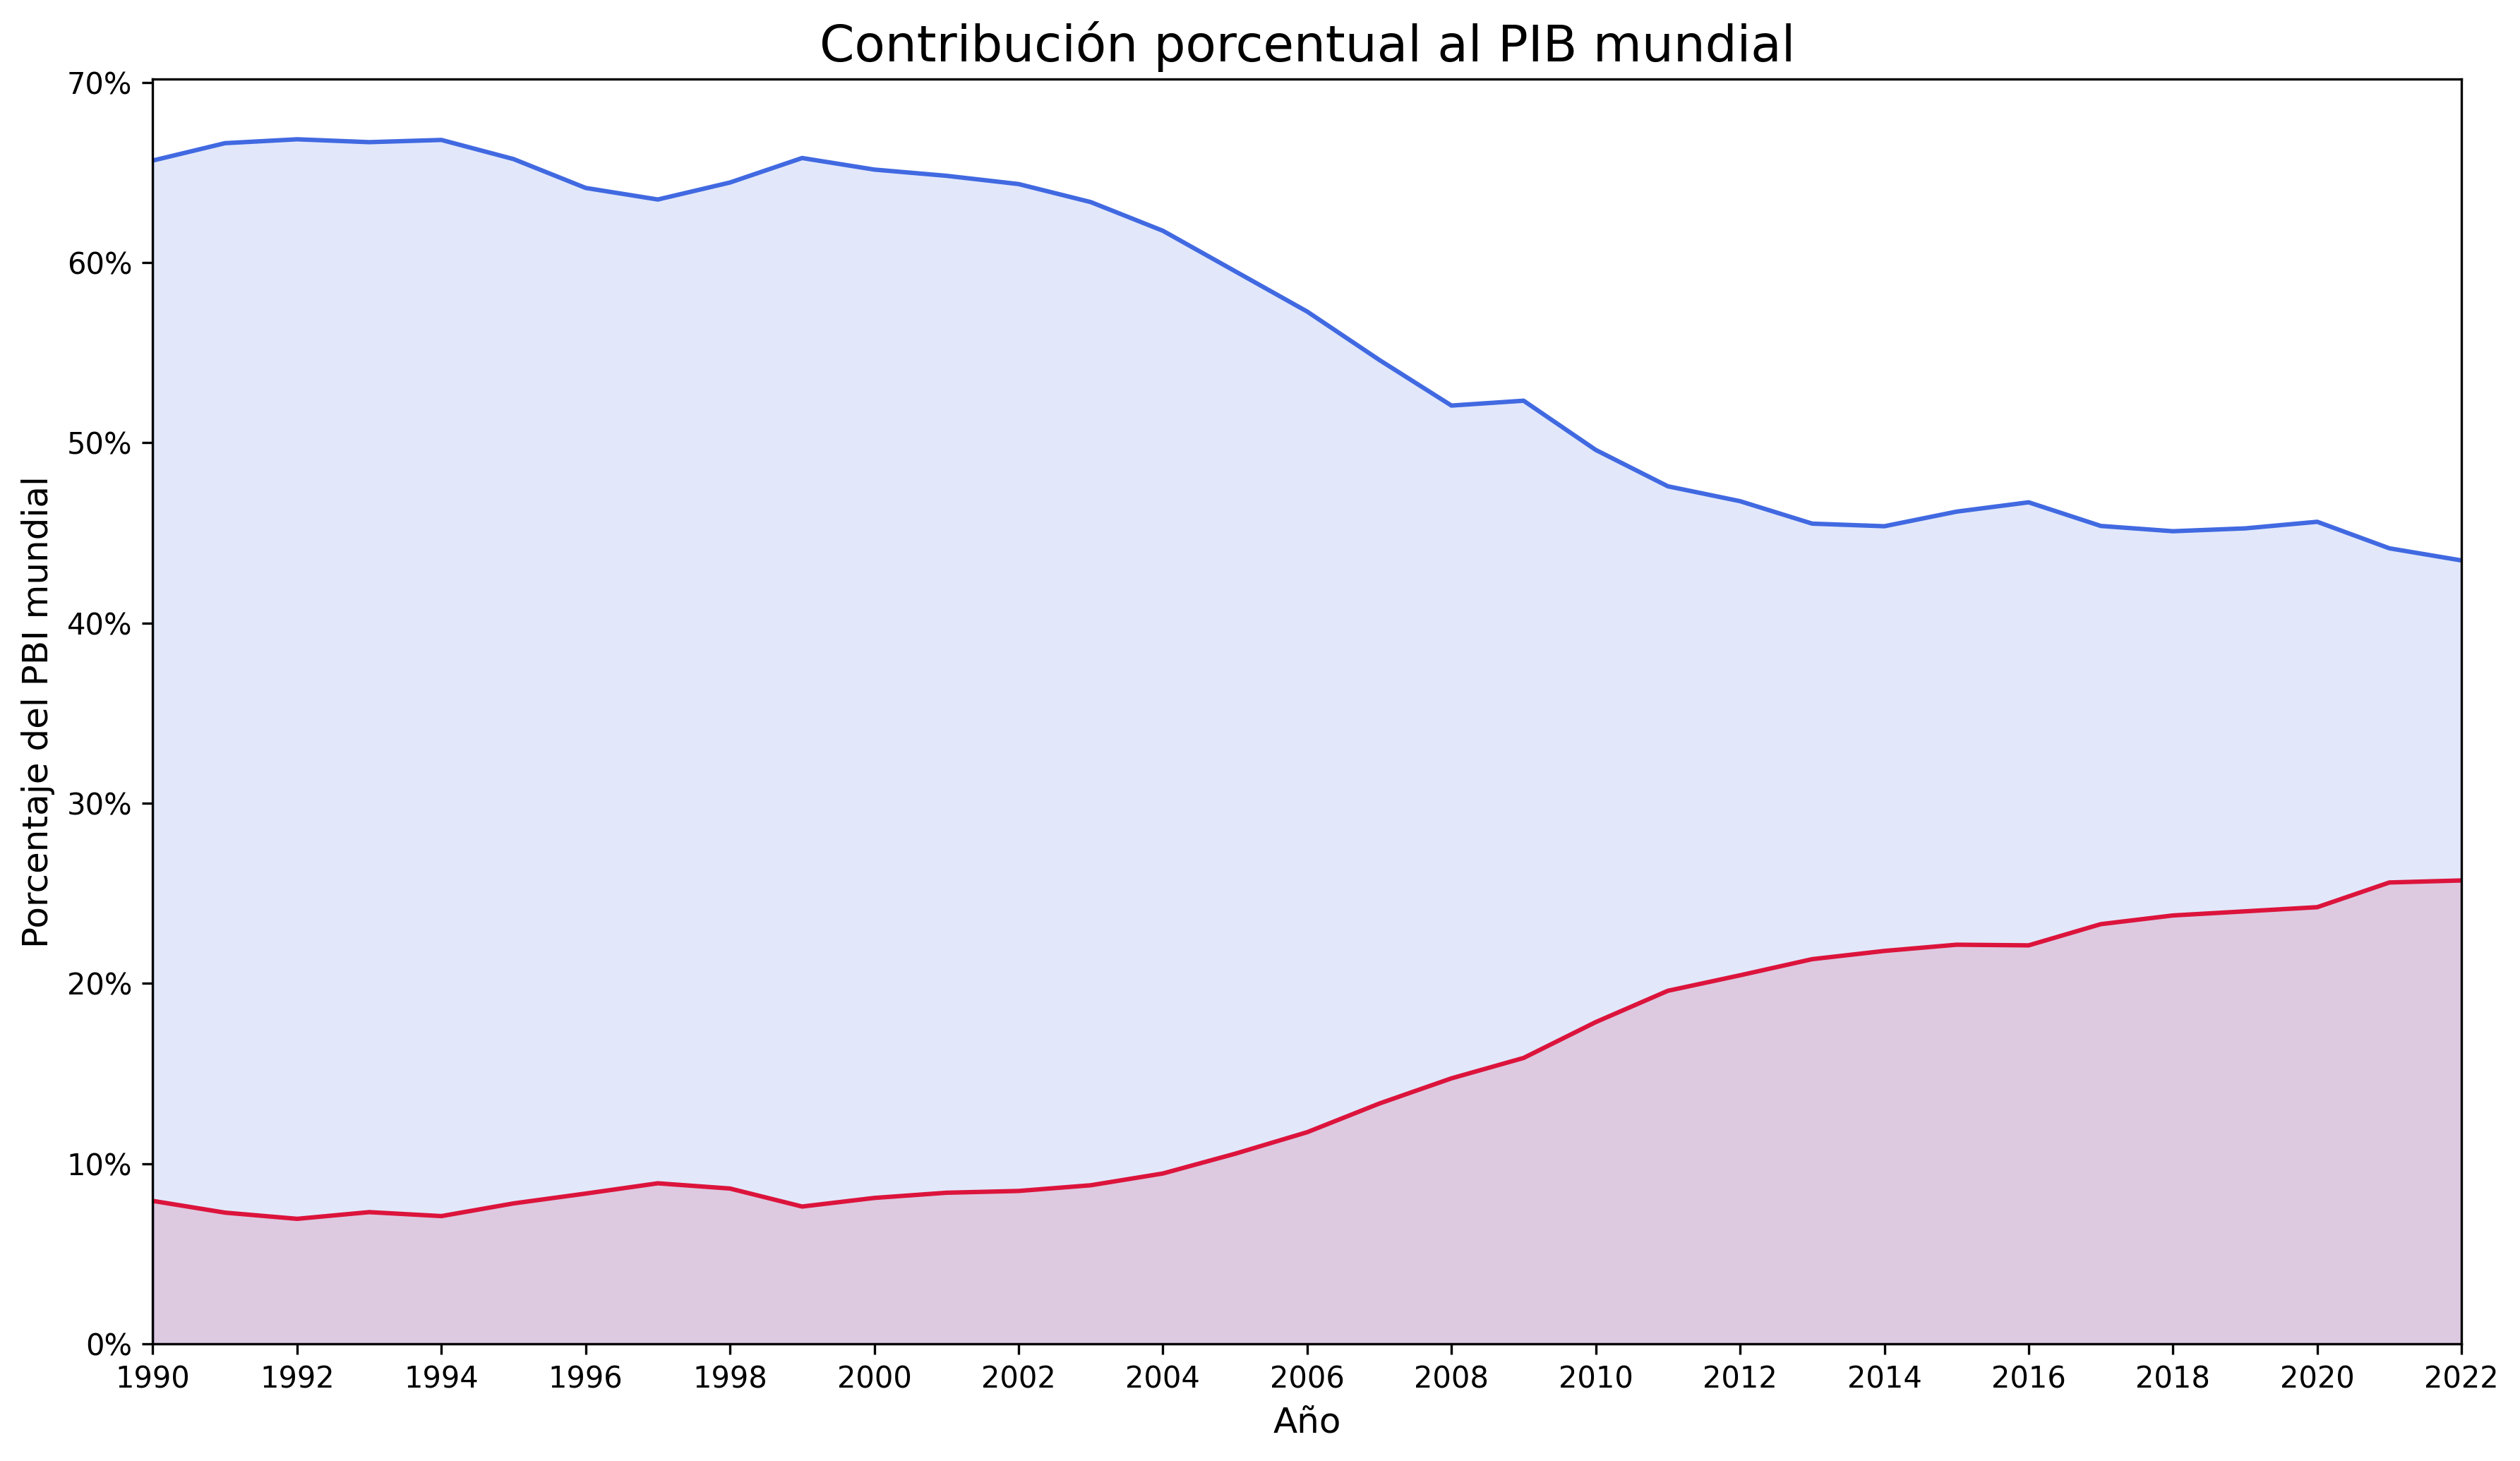

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=300)

sns.lineplot(data=pbi_filtered_melt[pbi_filtered_melt.Group != 'None'],
                x='Year_ok',
                y='PBI_perc',
                hue='Group',
                palette={'G7': 'royalblue', 'BRICS': 'crimson', 'None': 'lightgray'},
                ax=ax,
                zorder=2,
                estimator=np.sum,
                errorbar=None,
                legend=False
                )

# fill the area between each line and the x axis with the same color as the line
for line in ax.lines:
    y = line.get_ydata()
    ax.fill_between(range(len(y)), y, color=line.get_color(), alpha=0.15)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:2], labels=['BRICS', 'G7'], title='Grupo', loc='upper right', fontsize=11)

ax.set_xlim(0, 32)
ax.set_ylim(0)

ax.set_title('Contribución porcentual al PIB mundial', fontsize=17)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje del PBI mundial', fontsize=12)


ax.set_xticks(np.arange(0, 33, 2))
ax.set_xticklabels(np.arange(1990, 2023, 2))

# nombres en el eje y como porcentajes
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

plt.tight_layout()
plt.savefig('../pbi_contribution_espanol.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [124]:
handles

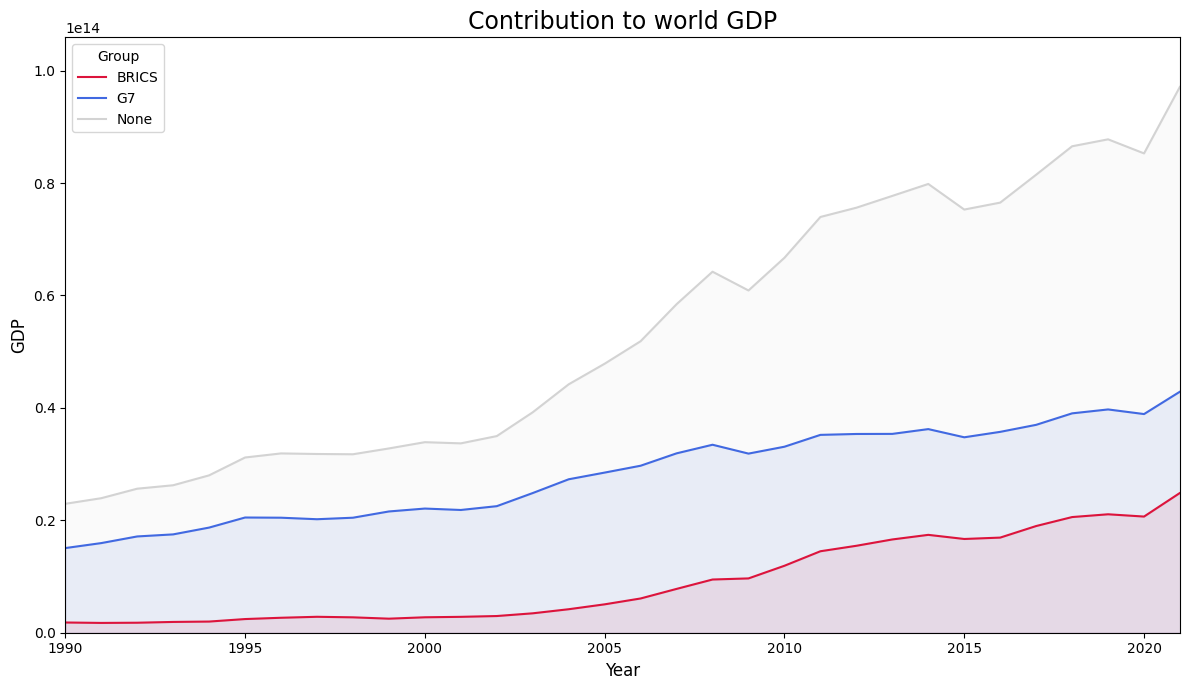

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

sns.lineplot(data=pbi_filtered_melt,
                x='Year_ok',
                y='PBI',
                hue='Group',
                palette={'G7': 'royalblue', 'BRICS': 'crimson', 'None': 'lightgray'},
                ax=ax,
                zorder=2,
                estimator=np.sum,
                errorbar=None,
                )

# fill the area between each line and the x axis with the same color as the line
for line in ax.lines:
    y = line.get_ydata()
    ax.fill_between(range(len(y)), y, color=line.get_color(), alpha=0.1)

ax.set_xlim(0, 31)
ax.set_ylim(0)

ax.set_title('Contribution to world GDP', fontsize=17)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP', fontsize=12)

# nombres en el eje x cada 5 años
ax.set_xticks(np.arange(0, 32, 5))
ax.set_xticklabels(np.arange(1990, 2023, 5))

plt.tight_layout()
plt.show()